In [ ]:
pip install matplotlib

In [ ]:
pip install plotly

In [ ]:
pip install wordcloud

In [20]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [119]:
pip install emoji

  Created wheel for emoji: filename=emoji-0.5.4-cp37-none-any.whl size=42181 sha256=a14d341d7fd4dc4a4a4d2e4100a59324dff8a05a288a0a737e6830aeb78ec4b8
  Stored in directory: C:\Users\IS97315\AppData\Local\pip\Cache\wheels\2a\a9\0a\4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [120]:
import codecs
import imageio
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import tweepy
import locale
import emoji

In [62]:
locale.setlocale(locale.LC_ALL, 'tr_TR.utf8')

'tr_TR.utf8'

In [25]:
train = pd.read_csv('metin.txt', sep=" ", header=None, error_bad_lines=False , encoding="latin-1")

In [145]:
def get_user_tweets(api, username, count=200):
	tweets = api.user_timeline(username, count=count)
	texts = [tweet.text for tweet in tweets]

	return texts

In [23]:
pm = __import__("stop_words")
#print(dir(pm))
print(pm.STOP_WORDS)

{'birkaçına', 'birçoğuna', 'tam', 'ait', 'başkasını', 'birine', 'hoş', 'evvelden', 'olmak', 'böyle', 'oracık', 'pekçe', 'bitevi', 'böylece', 'birilerinde', 'burasından', 'kaçının', 'kimisine', 'itibaren', 'iken', 'daima', 'biraz', 'oysa', 'birinde', 'doğru', 'aynen', 'nedeniyle', 'evvelemirde', 'az', 'onda', 'inen', 'ederek', 'nazaran', 'birbirinde', 'dahil', 'gibi', 'önceleri', 'orada', 'burasının', 'nasıl', 'ediyor', 'evveli', 'tabii', 'oysaki', 'öz', 'sonra', 'niçin', 'yalnızca', 'cümlesini', 'dayanarak', 'ister', 'öbürkü', 'evleviyetle', 'yani', 'hiçbirinin', 'keza', 'daha', 'ne', 'yahut', 'için', 'mü', 'neredeyse', 'birkaçının', 'veyahut', 'çokluk', 'hepsinin', 'birisi', 'yalnız', 'ilen', 'adamakıllı', 'nihayet', 'olan', 'çokça', 'arada', 'çünkü', 'birçok', 'kısacası', 'mi', 'evvela', 'hele', 'bizimki', 'dolayı', 'oraya', 'şuna', 'yakinen', 'leh', 'değin', 'şu', 'kendisine', 'hasılı', 'şunu', 'hangisine', 'şöyle', 'ben', 'tamam', 'denli', 'öbürüne', 'esnasında', 'nasılsa', 'kime',

In [63]:
#twitter authentication
CONSUMER_KEY        = 'soqfmhM49WyCCsdRVYUWi0Fv0'
CONSUMER_SECRET     = 'Z4aSo3KNf8HqSrdZnspK6UyYSunr0rlXL81bKaRmGK29ySw20c'
ACCESS_TOKEN        = '156247020-4H3axzwNGpzM3sQbLw36N2Kp51DlnFyYySuHDUJL'
ACCESS_TOKEN_SECRET = 'QlNx3snGqgrLEKNNDFI9TPMgWVsyEXOr8C3obls3wqRAU'
username="umutbaygut"
AUTH = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
AUTH.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(AUTH)

tweets = get_user_tweets(api, username)
name = api.get_user(username).name

cevap=0
rt=0
tw=0
for data in tweets:
    if data[0] == "@":
        cevap =  cevap + 1
    elif data[0:2] == "RT":
        rt = rt + 1
    else:
        tw = tw + 1

print(cevap)
print(rt)
print(tw)

lower_map = {
    ord(u'I'): u'ı',
    ord(u'İ'): u'i',
    ord(u'Ç'): u'ç',
    ord(u'Ğ'): u'ğ',
    ord(u'Ö'): u'ö',
    ord(u'O'): u'o',
    ord(u'U'): u'u',
    ord(u'Ü'): u'ü',
    ord(u'Ş'): u'ş',
    ord(u'S'): u's',
    }




90
80
21


In [26]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


In [122]:
datas=[]
for tweet in tweets:
    for word in tweet.split(" "):
        datas.append(emoji.demojize(word.translate(lower_map).lower()))

In [123]:
print(datas)

[':face_with_symbols_on_mouth:', 'https://t.co/cgk7orj8zk', '@nasirlionur', 'biliyorum', 'keke', 'o', 'yüzden', 'öyle', 'dedim', 'zaten', ':d', 'yoksa', 'diyarbakırda', 'bizimde', 'evimiz', 'var', '@nasirlionur', 'yarın', 'sendeyiz', '@kadiralan021', 'arka', 'planda', 'çalışıyor', 'mu', 'boşuna', 'indirmeyelim', 'norman', 'stone', 'yani', '2.', 'babam', '.', '2005', 'yılından', 'beri', 'hayatımda', 'öyle', 'bir', 'dokunuşlar', 'yaptı', 'ki', 'yazsam', 'kitap', 'olur.', 'dün', 'genel…', 'https://t.co/zbrmpmckeu', '@mshowto', '@devrimgunduztr', '@caglarozenc', '@bakiabaci', '@mgunesx', '@mrtaydogann', '@servanoral', '@m3rtyeter', 'bende', 'ordayım', ':thumbs_up::thumbs_up::thumbs_up:', 'rt', '@siradandemokrat:', 'bir', 'sanat', 'eserinin', 'restorasyonu', 'https://t.co/azfuıfllo3', '@_aslihankara_', 'yeni', 'organizasyon', 'yansıdı', 'mı', ':grinning_face_with_sweat:', 'daha', 'doğru', 'bir', 'tespit', 'yok', 'https://t.co/ovrgse29vt', '@fatih', '@fkadev', 'fatih', 'abi', 'anı', 'yaşamak

In [124]:
train = pd.DataFrame(datas) 

In [125]:
print(train.unstack())

0  0       :face_with_symbols_on_mouth:
   1            https://t.co/cgk7orj8zk
   2                       @nasirlionur
   3                          biliyorum
   4                               keke
                       ...             
   1902                              ay
   1903                           yazar
   1904                      maaşlarını
   1905                     yatırmadığı
   1906                            içi…
Length: 1907, dtype: object


In [126]:
train.unstack().value_counts()

rt               81
bir              20
,                15
:)               14
ve               13
                 ..
çalışıyor         1
@fmdisci0glu      1
geliştirilir      1
müfredatından     1
yazıyormuş        1
Length: 1338, dtype: int64

In [127]:
words=train.unstack().value_counts()

In [128]:
data = [go.Bar(
            x = words.index.values[:30],
            y = words.values[:30],
            marker= dict(colorscale='Jet',
                         color = words.values[:30]),
            text='ranking'
    )]
layout = go.Layout(
    title='Word Frequency Ranking'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='ranking')

In [129]:
sherlock = b'iVBORw0KGgoAAAANSUhEUgAAAnsAAAMOCAYAAABmrMBRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAN1wAADdcBQiibeAAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAAAXdEVYdFRpdGxlAEhvbG1lcyBzaWxob3VldHRljWN/WAAAAB10RVh0QXV0aG9yAGVkaXRlZCBieSBQYXVsIFNoZXJtYW4ZKSawAAAAGHRFWHRDcmVhdGlvbiBUaW1lADEyLzI3LzIwMTOCYNxYAAAAWHRFWHRDb3B5cmlnaHQAQ0MwIFB1YmxpYyBEb21haW4gRGVkaWNhdGlvbiBodHRwOi8vY3JlYXRpdmVjb21tb25zLm9yZy9wdWJsaWNkb21haW4vemVyby8xLjAvxuO9+QAAIABJREFUeJzs3XeUVHWe/vGnIyASJacGFARRTIggYQQEHAmCsoKArgHUMeAgpsExoM6AEQUEQYKIINhkQUI3IEgQGpqcQXJO3Q1N56rfHzPLz2yHqvpU3ft+nePZ9dhd9z2zs3MevrfqVpjX6/UKAAAAjhRuHQAAAAD/YewBAAA4GGMPAADAwRh7AAAADsbYAwAAcDDGHgAAgINFWgcAcB+Px6MdO3Zo7969Onz4sI4dO6bDhw/r+PHjysrK+sPfLVGihMLDw1W4cGFVqVJFlStXVrVq1S79zzJlygToXwUAhAbGHoCAyMrK0uzZs/XVV18pPj5eycnJfrlO6dKlVbt2bV199dW6+uqrVa9ePTVu3Fhly5b1y/UAINiF8VBlAP509uxZjRo1SsOGDdORI0fMOmrVqqVGjRqpcePGatWqlWrXrm3WAgCBxNgD4BenT5/Wm2++qbFjxyo1NdU651euuuoqtWvXTnfddZf+8pe/qFChQtZJAOAXjD0APpWVlaVhw4bpzTffVFJSknVOrhQrVkwdO3ZU165d1aZNG4YfAEdh7AHwmR07dqhHjx5KTEy0Tsm3kiVLqnPnznriiSfUsGFD6xwAKDDGHgCf+Oyzz/T3v/9dFy9etE7xmdtuu01///vf1blzZ0VG8nk2AKGJsQegQHJycvTss8/qk08+sU7xm+rVq2vAgAHq2bOnwsN5PCmA0MLYA5BvGRkZuvfeezV37lzrlIC48cYb9d5776lVq1bWKQCQa/wRFUC+eL1e9erVyzVDT5LWr1+vO+64Q+3atdPmzZutcwAgVxh7APJlxIgR+vLLL60zTHz77be64YYb9NBDD2nnzp3WOQDwh7iNCyDPLly4oGrVquncuXPWKebCw8PVsWNHvfDCC7rtttuscwDgVzjZA5BnkyZNYuj9l8fj0cyZM9WkSRPddtttmjhxojIyMqyzAOASTvYA5FmbNm0UFxdnnRG0ihcvrm7duumpp55S/fr1rXMAuBxjD0CeeL1eFS9eXBcuXLBOCXrh4eFq3bq1/va3v6l9+/aKiIiwTgLgQow9AHly6NAhVatWLaDXLFmypMLCwpSRkRGyD22uWrWqevfurV69eqlixYrWOQBchLEHIE+2b9+ua665xm+vX7VqVd19991q3bq16tSpo2rVqqlw4cKX/nl6errOnDmjkydPavPmzdqyZYuWL1+uNWvWKCcnx29dvhIVFaVWrVqpS5cu6tSpk6644grrJAAOx9gDkCcbN27UDTfc4PPXjYmJ0eDBg9WxY8d83e48ffq0pk6dqg8++EB79uzxeZ8/REZG6vbbb1eXLl3UuXNnlStXzjoJgAMx9gDkSWJiom6++Wafvma9evW0fPlylSxZssCvlZOTo08++UQvvfSS0tPTfVAXGOHh4br++uvVsmVLtWrVSs2aNdPll19unQXAARh7APLkzJkzKlOmjE9fc9GiRWrZsqVPX3PVqlVq2bJlSA2+n4qKilLDhg3VqlUrNWnSRA0aNFDp0qWtswCEIMYegDwrX768Tp486bPXu3DhgooWLeqz1/s/7733nl588UWfv66VmjVr6pZbblGDBg3UoEED3XTTTSpevLh1FoAgx9gDkGctWrTQd99957PXO3bsmCpUqOCz1/vp61aqVMnnrxsswsPDVbNmTdWqVUt16tRR7dq1Vbt2bdWqVUtVq1a1zgMQJCKtAwCEnrZt2/p07E2cOFH9+vXz2ev9H3+cFgYTj8ejPXv2aM+ePZo3b97P/lnRokVVu3Zt1axZU1WqVFHlypVVsWJFVatWTRUrVlSVKlVUpEgRo3IAgcTJHoA827Nnj2rVquWz14uOjtawYcPUq1cvhYWF+ex1Fy9erFatWvns9ZymVKlSqlSpkipVqqSyZcuqTJkyKlu2rMqWLaty5cpd+vsyZcr4/H2aAAKHsQcgX2666SatX7/ep6954403qk+fPmrXrp3Kli1boNfyeDzq0KGDvv32Wx/VuVtERISKFy+uEiVKqGjRoipatOgf/n3hwoUv/Y4klShRQuHh4SpSpIgKFy6syMhIFStW7Gf/7Kc/D8B3GHsA8mX8+PF66KGH/PLa4eHhuvnmm3XnnXfq1ltv1Y033pin997t2rVL/fr105w5c/zSB//7v1Eo/ee7hiMiIhQeHq7SpUurVKlSKlWq1G/+7zExMapZs6ZKlChh/K8ACB6MPQD5kp2drXr16mnXrl0BuV7ZsmVVt25d1a5dW9WrV1exYsUujQGv16sTJ07o2LFjWrVqlTZu3BiQJgSvMmXKqGbNmrryyit15ZVXqlGjRmratCkjEK7E2AOQb19++aUeeOAB6wwgV8LDw1W/fn01a9ZMzZs3V5s2bbhtDFdg7AHIN6/Xq/bt2/O+OISkiIgINWrUSP/zP/+je+65h8fVwLEYewAK5NChQ6pfv76SkpKsU4B8i4iIUMuWLfXII4+oU6dOl94iADgBYw9AgX311Vfq3r27dQZcqly5cpe+R9jr9erkyZNKTU3N9+uVKlVKPXr0UN++fVWzZk1fZQJmGHsAfOKNN97QgAEDrDPgEhEREerbt6+efvppxcTE/Oqfp6am6vDhwzp69Kh2796tXbt2afv27VqxYoWSk5NzdY3IyEh1795d//jHP1SnTh1f/0sAAoaxB8Bn+vXrpw8//NA6Aw5XunRpzZgxQ82bN8/z72ZnZ2vt2rX65ptvNGbMGJ04ceJPfycyMlIvvviiXnvtNRUqVCg/yYApxh4An/F6vXrsscc0evRo6xQ4VJEiRfT999/r5ptvLvBrZWZmKjY2Vq+99pp+/PHHP/35evXqaeLEibr++usLfG0gkMKtAwA4R1hYmEaMGKHWrVtbp8ChBg0a5JOhJ/3na/p69Oihbdu26a233lJERMQf/vzWrVvVvHlzxcfH++T6QKBwsgfA5w4ePKhrrrmmQG+SB36pTJkyOnLkiKKjo/3y+jNnzlT37t2Vlpb2hz8XHR2tyZMnq3Pnzn7pAHyNkz0APletWjU9/PDD1hlwmKpVq/pt6ElSp06d9NFHH/3pz2VmZuqBBx7Qpk2b/NYC+BInewD8YsWKFWratKl1BhwkIiJC69at8/t75po1a6bly5f/6c/VrFlTa9euValSpfzaAxQUJ3sA/OK6666zToDD5OTk6N5779WePXv8ep1u3brl6ud+/PFH9evXz68tgC8w9gD4RWZmpnUCHGjv3r1q0KCBhgwZouzsbL9cIy9/UPn888+1ZMkSv3QAvsLYA+AXU6dOtU6AQyUnJ+vZZ5/VzTffrNjYWJ+PvrCwsFz/rNfr1d/+9je/DU/AFxh7AHxu1apVevHFF60z4HCbNm3Sfffdp+rVq+utt97Srl27fPK669evz9PP79y5UxMnTvTJtQF/4AMaAHwmPT1d7777rgYNGvSnj68A/OHqq69Wx44d1apVKzVo0EBXXHFFnn4/NTVVjRs31ubNm/P0e1deeaV27NihyMjIPP0eEAiMPQAF5vV69c033+i5557T3r17rXOAS2rWrKkGDRooJiZGVapUUZUqVVS8ePGf/UxWVpZOnTqlLVu2aMqUKTp48GC+rjV69Gg9+uijvsgGfIqxByDfPB6PYmNjNXDgQG3cuNE6BzBVqVIl7dy5U5dffrl1CvAzvGcPQJ5lZmZq7Nixqlu3rrp168bQAyQdPXpUTz31lHUG8Cuc7AHItczMTI0bN04DBw7UgQMHrHOAoMTtXAQbxh6AP5WZmakxY8Zo0KBB+X4/E+AW0dHRWrBggW6//XbrFEASYw/AH8jOztbYsWP15ptv6siRI9Y5QMgoVqyYli9frvr161unAIw9AL/m9Xo1depUvfrqq9q5c6d1DhCSYmJi9MMPP6hChQrWKXA5xh6An9m6dav69OmjxYsXW6cAIa9JkyaKj49X4cKFrVPgYnwaF4Ak6dSpU3rwwQdVv359hh7gIytWrFCXLl2UlZVlnQIXY+wB0KRJk1S/fn1NmDBBHo/HOgdwlLlz5+rJJ58UN9Jghe91AVzswIEDeuyxx7Rw4ULrFMDRRo8erUKFCmnYsGHWKXAhTvYAl5o4caJuvPFGhh4QIJ988okGDx5snQEX4gMagMtcuHBBTzzxhCZOnGidArhOWFiYRo4cqd69e1unwEUYe4CLHDt2TB06dNC6deusUwDXioqK0rRp09ShQwfrFLgEYw9wia1bt6pdu3Z8zRkQBAoVKqRZs2apbdu21ilwAd6zB7jA0qVL1bRpU4YeECQyMjLUuXNnLVmyxDoFLsDYAxwuNjZWbdq0UVJSknUKgJ9IS0tTu3bteK4l/I6xBzjY6NGjdf/99yszM9M6BcBvSEtLU4cOHfTdd99Zp8DBGHuAQ73//vt67LHHlJOTY50C4A9cvHhR7du31/fff2+dAofiAxqAAw0aNEj/+Mc/rDMA5MEVV1yhRYsW6frrr7dOgcMw9gAH8Xg8euaZZzR8+HDrFAD5UKJECc2fP1+NGjWyToGDMPYAh/B4PHryySc1cuRI6xQABVC6dGnFxcXppptusk6BQzD2AAfIyspSjx49FBsba50CwAeKFi2quXPn6i9/+Yt1ChyAD2gAIS4rK0vdu3dn6AEOkpqaqnbt2vEpXfgEJ3tACMvIyNC9996ruXPnWqcA8IOiRYvqm2++UYsWLaxTEMI42QNCVHZ2th588EGGHuBgqamp6tSpk1auXGmdghDG2ANCUHp6ujp27Kivv/7aOgWAn6WkpKhly5aaOXOmdQpCFGMPCDFpaWnq1KmT5s2bZ50CIEAyMjLUtWtX3puLfGHsASHk/4beggULrFMABFhmZqbuv/9+jR071joFIYaxB4SIjIwMdenSRQsXLrROAWAkJydHjz32mMaMGWOdghDC2ANCQHp6utq3b69vv/3WOgWAsZycHPXq1UsDBgywTkGIYOwBQS47O1s9e/ZUfHy8dQqAIPLGG28w+JArPGcPCGLZ2dm67777NGPGDOsUAEGqS5cumjBhggoXLmydgiDF2AOCVHZ2tu6//35NnTrVOgVAkGvRooWmT5+ukiVLWqcgCHEbFwhCHo9Hjz76KEMPQK4sWbJETZs21cGDB61TEIQYe0CQ8Xq96t27t7744gvrFAAhZOvWrWrUqJE2bNhgnYIgw9gDgszLL7/Mc7QA5MuxY8fUqlUrHtGEn2HsAUGkb9++evfdd60zAISws2fP6s4779TLL78sj8djnYMgwAc0gCDx73//W6+88op1BgAH6d69u0aPHq0iRYpYp8AQYw8IAkOHDlWfPn2sMwA40E033aRp06apevXq1ikwwm1cwNiIESP07LPPWmcAcKjExETVr19fkydPtk6BEcYeYGjs2LF66qmnxAE7AH86f/687r//fj3++OPKyMiwzkGAcRsXMBIbG6v7779fOTk51ikAXOSmm25SbGysatasaZ2CAGHsAQaWLl2qv/71r0pLS7NOAeBCZcuW1Zdffqk2bdpYpyAAuI0LBNiyZct01113MfQAmDl16pTuvPNOvfHGG9YpCABO9oAAWrdunVq2bKmUlBTrFACQJD300EMaOXKkoqOjrVPgJ4w9IEC2bdumv/zlLzp9+rR1CgD8TJMmTTRz5kyVKVPGOgV+wNgDAuDw4cNq2rSpDhw4YJ0CAL+pfv36mjNnjqpWrWqdAh/jPXuAn505c0Zt2rRh6AEIaps2bdKtt96qxMRE6xT4GGMP8KOkpCS1bNlS27dvt04BgD917NgxNW/eXEuWLLFOgQ8x9gA/SU9PV+fOnbVp0ybrFADItdTUVLVv316LFi2yToGPMPYAP8jOzlbXrl313XffWacAQJ5dvHhRHTt2VFxcnHUKfICxB/iY1+vVo48+qtmzZ1unAEC+Xbx4UR06dNA333xjnYICYuwBPvbWW2/piy++sM4AgALLyMhQt27dFB8fb52CAuDRK4APffDBB3r++eetMwDAp4oUKaIFCxaoWbNm1inIB8Ye4CNff/217r//fnk8HusUAPC5MmXKaPny5br66qutU5BHjD3AB+Lj43XXXXcpKyvLOgUA/KZSpUpasWKFqlevbp2CPGDsAQW0ZcsWNWnShO+7BeAKV111lVasWKFy5cpZpyCX+IAGUAAnTpxQx44dGXoAXGPPnj1q3769Lly4YJ2CXGLsAfmUmZmprl27at++fdYpABBQCQkJ6t27t3UGcomxB+SDx+NRz549tXTpUusUADAxefJkDRo0yDoDucB79oB8eOWVV/Tvf//bOgMATIWHh2vu3Lm68847rVPwBxh7QB5NmjRJPXv2FP+vAwBS+fLltW7dOlWuXNk6Bb+DsQfkwffff69WrVrxiBUA+IkbbrhBK1euVJEiRaxT8Bt4zx6QS6dOnVLPnj0ZegDwCxs2bFC/fv2sM/A7ONkDciEnJ0etW7fWkiVLrFMAIGjNmDFDnTp1ss7AL3CyB+TCW2+9xdADgD/x8MMP6/Dhw9YZ+AVO9oA/kZCQoCZNmnD7FgByoVOnTpoxY4Z1Bn6Ckz3gD2RkZOiBBx5g6AFALs2cOVOjRo2yzsBPMPaAP/D+++9r586d1hkAEFKee+457d692zoD/8VtXOB37N+/X9dee61SU1OtUwAg5LRo0ULx8fEKD+dcyRr/FwB+x1NPPcXQA4B8WrJkicaMGWOdAXGyB/ym2bNn6+6777bOAICQVrx4ce3YsUMVK1a0TnE1TvaAX8jKytKLL75onQEAIS8lJUUvv/yydYbrMfaAXxgzZgwfygAAH5kwYQLPKTXGbVzgJ1JSUlSrVi2dPHnSOgUAHKNevXpav369oqKirFNciZM94CeGDRvG0AMAH9u6dauGDx9uneFanOwB/5WSkqIaNWro7Nmz1ikA4DjFixfX7t27Va5cOesU1+FkD/ivYcOGMfQAwE9SUlL09ttvW2e4Eid7gKSkpCRVr15dycnJ1ikA4FhRUVHaunWratWqZZ3iKpzsAZKGDh3K0AMAP8vKytJrr71mneE6nOzB9dLS0hQTE6NTp05ZpwCA44WHh2v9+vWqX7++dYprcLIH1xszZgxDDwACxOPx8OD6AONkD66Wk5OjWrVqad++fdYpAOAq8fHxatWqlXWGK3CyB1ebO3cuQw8ADLz55pvWCa7B2IOrvfvuu9YJAOBKy5Yt0/Lly60zXIGxB9fasGGDVqxYYZ0BAK71wQcfWCe4AmMPrsVX9wCArVmzZmnLli3WGY7H2IMrJScna9KkSdYZAOBqXq9X77//vnWG4zH24EpffvmlUlNTrTMAwPUmTZqkgwcPWmc4GmMPrjRmzBjrBACA/vOtGp988ol1hqPxnD24TmJiom6++WbrDADAfxUtWlQHDhzQFVdcYZ3iSJzswXW++uor6wQAwE+kpqZq5MiR1hmOxckeXMXr9apGjRo6cOCAdQoA4CeqVKmi/fv3KyIiwjrFcTjZg6ssW7aMoQcAQejw4cOaM2eOdYYjMfbgKrGxsdYJAIDfMW7cOOsER+I2LlzD6/WqWrVqOnz4sHUKAOA3RERE6Mcff1S1atWsUxyFkz24xqZNmxh6ABDEcnJyNH78eOsMx2HswTXmzp1rnQAA+BNjx46Vx+OxznAUxh5cg7EHAMFv//79io+Pt85wFMYeXOHixYtas2aNdQYAIBf4oIZvMfbgCgkJCcrOzrbOAADkwowZM3T27FnrDMdg7MEVVqxYYZ0AAMiljIwMTZs2zTrDMRh7cIXVq1dbJwAA8oCx5zs8Zw+uUL58eZ08edI6AwCQSxERETp69KjKlStnnRLyONmD4x05coShBwAhJicnR99++611hiMw9uB4CQkJ1gkAgHzgu3J9g7EHx1u3bp11AgAgH+Li4pSVlWWdEfIYe3C8xMRE6wQAQD6kpKTwB3YfYOzB8XiYMgCErlWrVlknhDzGHhzt4MGDOn36tHUGACCfONkrOMYeHG358uXWCQCAAtiyZYt1Qshj7MHRli5dap0AACiAo0ePWieEPMYeHI2TPQAIbWfOnOETuQXE2INjnTx5Utu3b7fOAAAUgMfj0YkTJ6wzQhpjD461YsUK8W2AABD6GHsFw9iDY/F+PQBwhmPHjlknhDTGHhyL9+sBgDPs2rXLOiGkMfbgSElJSVq/fr11BgDAB3iwcsEw9uBI27Ztk8fjsc4AAPhAQkKCdUJIY+zBkQ4cOGCdAADwkQMHDvC+vQJg7MGR9u/fb50AAPChxMRE64SQxdiDI+3evds6AQDgQ5s2bbJOCFmMPTgSD1MGAGfZunWrdULIYuzBcU6fPs2beQHAYTZv3mydELIYe3CcOXPmKCcnxzoDAOBDfPAu/xh7cJwxY8ZYJwAAfCw5OVnnz5+3zghJjD04yubNm/nmDABwqMOHD1snhCTGHhxl1KhR1gkAAD85evSodUJIYuzBMY4fP67Ro0dbZwAA/ISTvfxh7MExPvnkE6Wnp1tnAAD8hLGXP4w9OML58+c1YsQI6wwAgB8dP37cOiEkMfbgCIMGDdKZM2esMwAAfnTq1CnrhJDE2EPIO3z4sAYPHmydAQDws9OnT1snhCTGHkLewIEDlZaWZp0BAPAzxl7+hHm9Xq91BJBfa9asUePGjeXxeKxTAAB+VqlSJR05csQ6I+Qw9hCyPB6Pbr31Vq1du9Y6BQAQANHR0UpPT1dYWJh1SkjhNi5C1sSJExl6AOAimZmZfGVaPjD2EJIOHz6sZ555xjoDABBgfCI37xh7CEl9+/ZVcnKydQYAIMD4kEbeMfYQcr7++mtNnTrVOgMAYODcuXPWCSGHsYeQsnPnTj366KPWGQAAI4y9vGPsIWRkZWXpoYce0oULF6xTAABGkpKSrBNCDmMPIeO5557TDz/8YJ0BADDEyV7eMfYQEv71r39p2LBh1hkAAGOMvbxj7CHoffHFF3r11VetMwAAQYDbuHnH2ENQW7p0qR5//HHxRS8AAImxlx+MPQStJUuW6K9//avS09OtUwAAQYLbuHnH2ENQWrZsmdq3b6+0tDTrFABAEGHs5R1jD0FnzZo16tChgy5evGidAgAIMoy9vGPsIahs3bpV7du3V0pKinUKACAInT9/3joh5DD2EDRWr16tpk2b8iXXAIDfxYP1846xh6CwcuVKtW3blk9ZAQD+UHp6urKzs60zQgpjD+YWLVqkNm3aKDk52ToFABACON3LG8YeTMXFxaljx45KTU21TgEAhAjGXt4w9mBmwYIF6tSpE5+6BQDkCWMvbxh7MDFmzBi1a9eOoQcAyDPGXt4w9hBw7733nnr37q2cnBzrFABACGLs5Q1jDwHj9Xr18ssv68UXX+S7bgEA+cbYy5tI6wC4g9frVd++ffXxxx9bpwAAQhxjL28Ye/C7tLQ0de/eXTNnzrROAQA4AGMvbxh78Kvk5GTdfffdWrp0qXUKAMAhGHt5w9iD3xw5ckR33nmntmzZYp0CAHAQxl7e8AEN+MXOnTvVtGlThh4AwOd4EH/eMPbgc6tWrdJtt92m/fv3W6cAAByIk728YezBp+bNm6fWrVvr7Nmz1ikAAIdi7OUNYw8+M2nSJHXq1InjdQCAXzH28oaxB59477331LNnT2VmZlqnAAAcjrGXN4w9FNi//vUvvhUDABAwjL284dEryDePx6NnnnlGw4cPt04BALgIYy9vGHvIF4/HoyeeeEKfffaZdQoAwGUYe3nD2EOeZWVl6cEHH9TkyZOtUwAALsTYyxvGHvIkPT1d9913n7755hvrFACASzH28ibMy7vqkUsZGRnq2rWrZs2aZZ0CAHCx8PBw5eTkWGeEDE72kCspKSnq0KGDli1bZp0CAHA5j8ejrKwsRUVFWaeEBB69gj915swZtWrViqEHAAgaGRkZ1gkhg7GHP3Tu3Dm1a9dOa9eutU4BAOASHuKfe9zGxe86fvy4WrRooR07dlinAADwM5zs5R4ne/hNDD0AQDDjZC/3GHv4ldOnT6tt27YMPQBA0GLs5R5jDz9z+vRptWrVSps2bbJOAQDgd3EbN/cYe7iEoQcACBWc7OUeYw+S/jP07rjjDoYeACAkcLKXe4w9XBp6GzdutE4BACBXONnLPcaey505c4ahBwAIOZzs5R5jz8UYegCAUMXJXu4x9lwqJSVF7dq104YNG6xTAADIM8Ze7vENGi507tw5tWrVSuvXr7dOAQAgX7iNm3uc7LnMhQsX1K5dO4YeACCkMfZyj7HnImlpabr77ru1atUq6xQAAAqE27i5x9hziYyMDHXq1EmLFy+2TgEAoMAYe7nH2HOBrKwsdevWTQsXLrROAQDAJ7iNm3uMPYfLzs5W9+7dNXPmTOsUAAB8hpO93GPsOZjH41GvXr00depU6xQAAHyKk73cY+w5lNfrVe/evTV+/HjrFAAAfI6Tvdxj7DnU3//+d40dO9Y6AwAAv2Ds5R5jz4HefvttDRkyxDoDAAC/4TZu7jH2HOaDDz7Qq6++ap0BAIBfZWVlWSeEDMaegwwcOFDPP/+8dQYAAH6XnZ1tnRAyGHsO8e6776p///7WGQAABAQne7nH2HOAYcOG6eWXX7bOAAAgYDjZyz3GXogbPny4+vTpI6/Xa50CAEDAcLKXe4y9EPbpp5/q6aefZugBAFyHk73cY+yFqM8++0xPPvkkQw8A4Eqc7OUeYy8Effnll/rb3/7G0AMAuBZjL/cYeyFm0qRJeuihh5STk2OdAgCAGW7j5h5jL4TMmjVLDz/8MEMPAOB6nOzlHmMvRHz22We69957+S5AAADEyV5eMPZCwAcffKDHH3+cEz0AAP6Lk73cY+wFuZdfflnPP/88H8YAAOAnGHu5x9gLYv3799c777xjnQEAQNBJT0+3TggZkdYB+LXs7Gw9/PDD+vLLL61TAAAISikpKdYJIYOTvSCTnZ2tRx55hKEHAMAfOH/+vHUxyfTrAAAgAElEQVRCyAjz8mawoHH+/Hl16tRJixcvtk4BACCohYWFKTs7W+HhnFv9Gf4dChJZWVm65557GHoAAOSC1+vVhQsXrDNCAmMvSPTu3Vvx8fHWGQAAhAxu5eYOYy8IxMbGavz48dYZAACEFD6kkTuMPWMXL15U3759rTMAAAg5nOzlDmPPWFxcnI4cOWKdAQBAyOFkL3cYe8ZWrVplnQAAQEg6evSodUJI4KHKCGmFChVShQoVVKVKFZUrV04lS5a89FehQoWUnZ2t8+fP68CBA1q9erX27dtnnQwA8JFDhw5ZJ4QExp6xxo0bWycEpfDwcJUvX16VKlX62V+VK1dWxYoVVaVKFVWoUEHlypXL0+t+//33ev/99zV79mw/lQMAAuXgwYPWCSGBhyoby8jIUK1atVz1p5OoqChVqlRJVatWVUxMjKpUqaIqVaqoatWql07pypcvr8hI//1ZZPXq1erTp4/WrFnjt2sAAPyrWbNmWrZsmXVG0GPsBYHZs2fr7rvvts7wmfLly18ab9WqVVO1atUu/X1MTIwqVKigiIgI60xlZ2frnXfe0WuvvSaPx2OdAwDIo5IlS+rs2bMKCwuzTglqjL0g0a9fP3344YfWGX/q8ssv/80BV7Vq1Ut/FS5c2DozTz7//HP16tVLOTk51ikAgDz68ccfVaNGDeuMoMZ79oLEe++9pwMHDmjatGlmDVFRUapcufLPBlyVKlUujbuqVauqVKlSZn3+8tBDDykpKYnnHQJACFq6dClj709wshdEsrKy1KtXL33xxRc+f+2oqChVrFjx0oCrXLmyqlWrpsqVK6ty5cqXbq+6+Qulu3XrpilTplhnAADy4MEHH+RbqP4EYy8IxcbGatCgQUpMTMzVz1922WWqUKHCpQFXqVKlSydy//dBiPLly7t6yOXG8ePHdfXVV/OQTgAIIWXLltXRo0f9+qG+UMfYC2IHDx7UgQMHdOrUqZ+9n+yyyy5T2bJlVb58eZUtW1aXXXaZYaWzvPHGGxowYIB1BgAgD+Li4nTHHXdYZwQtxh7wE8ePH1dMTIwyMzOtUwAAufTwww9r7Nix1hlBi/t6wE9UqFBBLVu2tM4AAOTB5MmTde7cOeuMoMXYA36hRYsW1gkAgDxIS0vjA3Z/gLEH/MINN9xgnQAAyKMRI0ZYJwQtxh7wCzyvCQBCz6ZNm3L9FAu3YewBv1CkSBHrBABAPnz66afWCUGJsQf8Al+bBgChacqUKUpNTbXOCDqMPeAXjh49ap0AAMiHlJQUff3119YZQYexB/zCnj17rBMAAPk0dOhQ64Sgw9gDfmHRokXWCQCAfFq/fr3mz59vnRFUGHvAT2RlZWnBggXWGQCAAhg8eLB1QlBh7AE/MX36dB0/ftw6AwBQAAsXLtS6deusM4IGYw/4L4/Ho/fee886AwDgA5zu/X+MPeC/Pv/8c/4kCAAO8fXXX+vgwYPWGUGBsQdI2rp1q5599lnrDACAj2RlZen999+3zggKYV6v12sdAVg6efKkWrRooW3btlmnAAB86PLLL9fBgwdVqlQp6xRTnOzB1fbv369mzZox9ADAgS5cuKBhw4ZZZ5jjZA+u9fXXX6t3795KSUmxTgEA+Mnll1+uvXv3qly5ctYpZjjZg+ukp6erX79+6tatG0MPABzuwoUL+uijj6wzTHGyB1f5/vvv9b//+7/at2+fdQoAIEAKFy6sPXv2qHLlytYpJjjZg2tMmTJFrVu3ZugBgMukp6e7+pO5nOzBFd544w29+eab4j/uAOBO0dHR2rFjh2rUqGGdEnCc7MHx+vfvrwEDBjD0AMDFMjMz9e6771pnmOBkD442YMAAvfHGG9YZAIAgEBUVpfXr16tevXrWKQHFyR4c6+2332boAQAuycrK0sMPPyyPx2OdElCMPTjSmDFj9Nprr1lnAACCTEJCgoYMGWKdEVDcxoXjLFmyRG3btlVWVpZ1CgAgCEVEROjrr7/WPffcY50SEIw9OMru3bvVqFEjnT171joFABDEoqOj9c0336hNmzbWKX7H2INjnD9/Xrfccot27txpnQIACAGlSpVSYmKiqlevbp3iV7xnD47xyCOPMPQAALl27tw53X333UpLS7NO8SvGHhxhypQpmjp1qnUGACDEbNq0Sf/85z+tM/yK27gIeQcPHtT111+vpKQk6xQAQAgKCwtTfHy8WrZsaZ3iF4w9hDSv16sWLVpo6dKl1ikAgBBWqVIlbd68WaVLl7ZO8Tlu4yKkjR8/nqEHACiwo0eP6plnnrHO8AtO9hCyTp48qbp16/KYFQCAz0yePFldu3a1zvApTvYQsl555RWGHgDAp/r06aOTJ09aZ/gUJ3sISYmJibrllltc9/2GAAD/a9OmjebPn6+wsDDrFJ/gZA8hqX///gw9AIBfLFy4UKNHj7bO8BlO9hBy4uPj1bp1a+sMAICDFS1aVBs2bNBVV11lnVJgnOwh5LzzzjvWCQAAh0tNTXXMp3MZewgpmzZtUnx8vHUGAMAF5s+fr88//9w6o8AYewgpn376qXUCAMBFXnrppZB/8gNjDyEjOTlZEyZMsM4AALjIyZMn9fzzz1tnFAhjDyFjwoQJunDhgnUGAMBlxo0bp4ULF1pn5BufxkXIqF+/vjZv3mydAQBwoZiYGG3dulVFixa1TskzTvYQEtasWcPQAwCYOXDggN58803rjHxh7CEkOOnhlgCA0PThhx8qMTHROiPPuI2LoHf+/HlVqlSJ9+sBAMw1aNBAP/zwgyIiIqxTco2TPQS9adOmMfQAAEFh7dq1GjNmjHVGnnCyh6B30003af369dYZAABIkkqVKqVdu3apTJky1im5wskegtqyZcsYegCAoHLu3Dm98cYb1hm5xthDUPvkk0+sEwAA+JVRo0Zp+/bt1hm5wm1cBK0ff/xRtWvXVk5OjnUKAAC/0qFDB82ePds6409xsoegNXz4cIYeACBoffPNN1q1apV1xp/iZA9B6eLFi6patWrIf/k0AMDZ2rVrpzlz5lhn/CFO9hCUxo4dy9ADAAS9uXPnat26ddYZf4ixh6Dj8Xj4YAYAIGQMHjzYOuEPMfYQdGbNmqUdO3ZYZwAAkCtTpkzRzp07rTN+F2MPQcXr9YbsF00DANwpOztbffv2tc74XYw9BJW4uDht2LDBOgMAgDyZN2+e5s+fb53xmxh7CCrvv/++dQIAAPny4osvKisryzrjVxh7CBorV65UXFycdQYAAPmyefNmDRw40DrjV3jOHoJG586dNXPmTOsMAADyrVChQlq/fr3q1q1rnXIJYw9BYefOnbrmmmvk8XisUwAAKJBWrVopLi5OYWFh1imSuI2LIDFw4ECGHgDAERYtWqQPPvjAOuMSTvZg7sCBA6pVq1ZQvqkVAID8KFSokFavXq3rr7/eOoWTPdgbMmQIQw8A4CgZGRl65JFHlJmZaZ3CyR5snTp1StWrV9fFixetUwAA8LnHH39cn376qWkDJ3swNWTIEIYeAMCxRo4cqS+++MK0gZM9mElNTVVMTIzOnDljnQIAgN8UL15cCQkJql27tsn1OdmDmREjRjD0AACOl5KSojvvvFOnTp0yuT4nezCRnp6uGjVq6Pjx49YpAAAERLNmzRQXF6dChQoF9Lqc7MHEV199xdADALjK999/r759+wb8upzsIeA8Ho/q1aunHTt2WKcAAAKkdOnSevbZZxUZGal9+/Zp8+bN2rZtm86fP2+dFnCvvvqq3nzzzYBdLzJgVwL+a+bMmQw9AHCRsLAwzZw5U82aNfvVP9u9e7fWrFmjNWvWKCEhQYmJicrIyDCoDJy33npLxYsX1/PPPx+Q63Gyh4Br2LChEhISrDMAAAHSrVs3ffXVV7n62dTUVC1btkxxcXGKi4vTli1b/FxnIywsTK+99ppef/11v3+HLmMPARUfH6/WrVtbZwAAAiQqKko7duxQzZo18/X7R48e1fz58zVv3jzFxcUpOTnZx4W2HnjgAY0ePVrR0dF+uwZjDwHVunVrxcfHW2cAAALkoYce0rhx43zyWtnZ2VqxYoXmzZunqVOnau/evT55XWstW7bU9OnTVaJECb+8PmMPAZOQkKCGDRtaZwAAAiQiIkLbtm3z28OEExISNGXKFH399dc6dOiQX64RKDfccIMWL16sUqVK+fy1GXsImHvvvVfTp0+3zgAABEiXLl0UGxvr9+t4vV6tWLFC48ePV2xsbMje6m3cuLHi4uJUtGhRn74uYw8BsWPHDtWrV08ej8c6BQAQIIsWLVLLli0Des20tDTNmDFD48aN06JFixRqM6dTp06aPn26Tz+0wUOVERDvvvsuQw8AXKRu3bpq0aJFwK9bpEgRde/eXXFxcdq8ebN69+6tIkWKBLwjv2bOnKkBAwb49DU52YPfHTp0SFdddZUyMzOtUwAAAfLxxx+rT58+1hmSpFOnTunjjz/WsGHDQuIWb3h4uObPn++zp1cw9uB3zz33nAYPHmydAQAIkGLFiunQoUN++3RpfiUnJ2vYsGH66KOPdPr0aeucP1ShQgVt2rRJZcuWLfBrcRsXfnXu3Dl99tln1hkAgAB68MEHg27oSVKJEiX0yiuvaP/+/fr4449Vq1Yt66Tfdfz4cb300ks+eS3GHvxq+PDhunDhgnUGACBAwsLC9PTTT1tn/KGiRYuqT58+2rFjh+bMmaPWrVv7/Vss8mP8+PFas2ZNgV+H27jwm7S0NNWoUUMnTpywTgEABEibNm20YMEC64w82759u4YOHapJkyYF1fv6fPHvJyd78Jvx48cz9ADAZV544QXrhHypW7euhg8frqNHj2r8+PFq3rx5UJz2LVy4UGvXri3Qa3CyB7/IyclRnTp1tGfPHusUAECA3Hrrrfrhhx+sM3xm165dGjdunMaPH69jx46ZdTz77LP66KOP8v37jD34xfTp03XvvfdaZwAAAmjWrFnq2LGjdYbP5eTkaNGiRZo4caJmzJih8+fPB/T6devW1bZt2/L9+4w9+EWLFi303XffWWcAAALkuuuu08aNG4Pi1qc/paWladasWZo4caIWLFigrKwsv1+zaNGiBfqwI2MPPrd582bVr1/fOgMAEEDTpk3TPffcY50RUGfOnNHs2bM1depUxcfH++3LAxo2bKjVq1fn+/cZe/C5xx9/XKNGjbLOAAAESJMmTbR8+XLrDFPJycn65ptvNG3aNC1YsEBpaWk+ed2oqCgtXLhQt99+e75fg7EHn0pKSlKVKlWUmppqnQIACICwsDCtWLFCjRs3tk4JGhcvXlR8fLzmzJmjuXPn6ujRo/l6nZIlS2rChAlq3759gXoYe/CpDz/8UP369bPOAAAEyL333qupU6daZwQtr9erdevWaf78+Vq2bJlWrVr1p++/K1KkiHr27KnXXntNVapUKXADYw8+dc0112j79u3WGQCAAIiOjtaWLVuC+mvHgk12drYSExP1ww8/6Mcff9ShQ4eUkpKikiVLqnbt2rr11lt1xx136LLLLvPZNSN99kpwvZUrVzL0AMBFXnzxRYZeHkVGRqphw4Zq2LBhwK7JN2jAZ8aNG2edAAAIkOrVq6t///7WGcgFbuPCJy5evKiKFSsqJSXFOgUAEACxsbHq0qWLdQZygZM9+MSSJUsYegDgErfffjvfkhRCGHvwiSVLllgnAAACICoqSkOHDnX8N2U4CWMPPrFz507rBABAALz00ku69tprrTOQB4w9+ASfxgIA56tbt67++c9/Wmcgjxh78IkHH3zQOgEA4Efh4eH67LPPVKhQIesU5BFjDz5xww03qFevXtYZAAA/+fvf/64mTZpYZyAfePQKfCYpKUmNGzfWjh07rFMAAD5UrVo1bdmyRcWKFbNOQT5wsgefKVmypObNm6eqVatapwAAfCQsLEyfffYZQy+EcbIHnzt8+LDuuusubd68OWDXLFq0qEqXLq3SpUsrMvL/fwtgVlaWjh07plOnTgWsBQCc5IknntCIESOsM1AAjD34xcWLF/XCCy9oxIgR8sV/xKKjo1W3bl3Vq1dPtWrVUs2aNS/9dcUVV/zpG4bT0tJ04MABLVq0SMOGDeNWMwDkQs2aNbVx40Zdfvnl1ikoAMYe/GrlypXq16+ffvjhhzz9Xvny5dWqVSvdcccdatCggerUqaOoqCifNGVmZurxxx/X559/7pPXAwAnCg8P15IlS9S8eXPrFBQQYw9+5/V6tWTJEg0fPlzz5s3TxYsXf/Uz4eHhuvnmm9WhQwe1b99eN9xwg9+fzv7yyy/rnXfe8es1ACBU9e3bVx9++KF1BnyAsYeAyszMVEJCgrZt26akpCRFR0fruuuu04033qhSpUoFtMXj8eiuu+7SggULAnpdAAh2derUUWJioooUKWKdAh9g7MHV9u3bp6uuukoej8c6BQCCQmRkpFasWKGGDRtap8BHePQKXK1GjRr661//ap0BAEHj7bffZug5DGMPrtelSxfrBAAICk2bNtXzzz9vnQEfY+zB9fgTLABIV1xxhSZPnqyIiAjrFPgYYw+ud/XVV/MmZACuN2zYMFWuXNk6A37A2IPrRUREqFy5ctYZAGCmV69e6tatm3UG/ISxB0gqUaKEdQIAmLj66qv10UcfWWfAjxh7gP7z3boA4DaRkZH6/PPP+e9Ah2PsAZLOnz9vnQAAAff222+rUaNG1hnwMx6qDEiqUqWKjhw5Yp0BAAHTqlUrLVy4UOHhnPs4HWMP0H9u4/7Wd/YCgBOVKFFCGzduVExMjHUKAoA5D9c7dOgQQw+Aq4wbN46h5yKMPbje1q1brRMAIGAeffRRde7c2ToDAcTYg+tt27bNOgEAAqJmzZr68MMPrTMQYIw9uN6yZcusEwDA76KjoxUbG6vixYtbpyDAGHtwtaysLC1evNg6AwD8bsCAAbrpppusM2CAsQdXS0hI4Bl7AByvSZMmeuGFF6wzYISxB1ebOXOmdQIA+FXhwoU1duxYRUREWKfACGMPrpWdna3x48dbZwCAX73++uuqXbu2dQYM8VBluNaCBQt05513WmcAgN9cddVV2rp1q6Kjo61TYIiTPbjWF198YZ0AAH719ttvM/TAyR7cKTk5WRUrVlRaWpp1CgD4xc0336yEhASFhYVZp8AYJ3twpcmTJzP0ADjaq6++ytCDJMYeXGrq1KnWCQDgNzVq1FD79u2tMxAkGHtwnfT0dK1YscI6AwD85qmnnuJRK7iEsQfXWbFiBbdwAThWeHi4evToYZ2BIMLYg+t8//331gkA4De33nqrKlSoYJ2BIMLYg+ts2rTJOgEA/KZt27bWCQgyjD24DmMPgJM1bNjQOgFBhufswVXS09NVtGhReTwe6xQA8Ivjx4+rfPny1hkIIpzswVVOnTrF0APgWDExMQw9/ApjD65y9uxZ6wQA8JtbbrnFOgFBiLEHVzl37px1AgD4zXXXXWedgCDE2IOrnD9/3joBAPwmJibGOgFBiLEHV2HsAXCySpUqWScgCDH24CpJSUnWCQDgN5dffrl1AoIQYw+usnnzZusEAPCbwoULWycgCDH24CoJCQnWCQDgN+np6dYJCEKMPbjG/v37tXHjRusMAPCb5ORk6wQEIcYeXOPDDz9Udna2dQYA+M3evXutExCEGHtwhZ07d2rMmDHWGQDgV7wvGb+F78aF46WlpemWW27R1q1brVMAwK+qVKmigwcPKiwszDoFQYSTPThaTk6OevXqxdAD4AqHDx/W6tWrrTMQZBh7cKycnBw9+OCDmjRpknUKAATMO++8Y52AIMPYgyMtWbJEt912G0MPgOvMmjVLCxcutM5AEOE9ewgJ586d05kzZ5ScnKykpCQlJycrJydH6enpSktLk8fj0dGjR7V3714tX75cBw8etE4GADNVqlTR6tWr+fo0SGLsIcicOXNG69atU2JiojZs2KC9e/dq7969OnfunHUaAISUa6+9VvHx8Spfvrx1Cowx9mAqJydHq1at0pw5czRnzhw+SAEAPlStWjXNmDFDN910k3UKDDH2YGLt2rX68ssvNXnyZJ04ccI6BwAcKyoqSv3799c//vEPFSpUyDoHBhh7CJiLFy9q/PjxGjp0qLZv326dAwCuUrFiRfXt21ePPvqoSpcubZ2DAGLswe9Onz6twYMHa+TIkTpz5ox1DgC4WuHChdW5c2d16dJFrVu3VrFixayT4GeMPfhNWlqaPv74Yw0aNIgv5waAIBQdHa1bb71VzZs3V5MmTdS0aVPGnwMx9uAXkyZN0ssvv6xDhw5ZpwAAcikiIkI33nijmjdvrhYtWqh169a8z88BGHvwqV27dunJJ5/UokWLrFMAAAVUokQJderUSd26dVObNm0UHs53MYQixh58Ijs7WwMHDtS//vUvZWRkWOcAAHysTp06eumll9SjRw9FRUVZ5yAPGHsosIMHD6pbt25atWqVdQoAwM9q1aqlCRMm6NZbb7VOQS5xHosCWbVqlRo2bMjQAwCX2L17t5o2baqPPvrIOgW5xMke8m3JkiVq3769Ll68aJ0CADDw/vvvq1+/ftYZ+BOMPeTLsmXLdNdddyk1NdU6BQBgaOTIkXrsscesM/AHGHvIs8WLF6t9+/ZKS0uzTgEAGAsPD9e0adPUqVMn6xT8DsYe8mTLli1q0qSJUlJSrFMAAEGiWLFiWrFiha677jrrFPwGxh5y7cSJE2rYsKEOHjxonQIACDLVqlXT2rVrVbZsWesU/AJjD7mSnZ2ttm3bavHixdYpfygqKkpNmzZV7dq1VblyZYWHh+v06dPavXu3Nm3axDd6AIAf/fWvf9WcOXN4+HKQYewhV5555hkNGzbMOuN3NWrUSI8//rg6duyo0qVL/+7PbdiwQbNnz9bs2bOVmJgo/uMPAL71z3/+U2+99ZZ1Bn6CsYc/NXnyZN1///3WGb+pbdu26t+/v5o3b57n3922bZuGDh2qCRMm8KliAPCRsLAwzZgxQ3fffbd1Cv6LsYc/dPToUV133XU6e/asdcrPVK5cWUOGDNE999xT4NdKSkrS6NGjNWjQIJ05c8YHdQDgbiVKlNDq1at19dVXW6dAfIMG/oDX61WvXr2Cbug99thj2r59u0+GniSVLFlSzz//vHbt2qWnn35akZGRPnldAHCr5ORk3XPPPbpw4YJ1CsTYwx8YNWqU5s2bZ51xSalSpTR16lSNHDlSxYoV8/nrly5dWkOHDtX69evVrFkzn78+ALjJtm3b1KdPH+sMiNu4+B0//vijrr/++qD5U9nNN9+s6dOnq1q1agG5Xk5OjgYOHKgBAwYoOzs7INcEACeaMmWK7rvvPusMV2Ps4Td16NBBc+bMsc6QJN1zzz2aMGGCLrvssoBfe+XKlerRo4f2798f8GsDgBOULFlSGzZsUExMjHWKa3EbF7/y7bffBs3Qe+mllxQbG2sy9CTptttu06pVq3TttdeaXB8AQl1SUpJ69uypnJwc6xTXYuzhZ9LT0/XMM89YZygsLEzDhw/XoEGDzB/OWaFCBS1fvly33XabaQcAhKrly5fr9ddft85wLcYefubjjz/Wjz/+aNoQFhamwYMH629/+5tpx0+VKFFC3377rerWrWudAgAh6Z133tHKlSutM1yJ9+zhkqNHj6pOnTo6f/68acfQoUP19NNPmzb8ni1btqhBgwbKyMiwTgGAkFO9enVt2LBBJUqUsE5xFU72cMkbb7xhPvQGDBgQtENPkq699lo999xz1hkAEJL279/Pf4ca4GQPkqQ9e/bommuuUVZWllnDM888oyFDhphdP7dOnDihqlWrmv57BQChKiwsTAsWLFDr1q2tU1yDkz1I+s+pnuV4ue+++/TRRx+ZXT8vypcvrzp16lhnAEBI8nq9euyxx4LmOa5uwNiD1q9fr0mTJpld/y9/+YsmTJhg/qnbvLC+3Q0AoWz//v3q16+fdYZrcBsXuueeezRjxgyTa1etWlWrV69WxYoVTa6fHydOnFCFChWsMwAgpIWHh2vp0qVq2rSpdYrjhc5RCvwiMTFRM2fONLl24cKFNWvWrJAaepIUHx9vnQAAIc/j8ejRRx9VWlqadYrjMfZcbuDAgbI63B0xYoRuvPFGk2sXRLB8uwgAhLpdu3bplVdesc5wPG7jutjBgwd15ZVXKjs7O+DX7t69uyZOnBjw6xZUTk6OypcvrzNnzlinAIAjREZGatWqVWrQoIF1imNxsudiQ4YMMRl6tWvX1qeffhrw6/rCDz/8wNADAB/Kzs7Www8/zMPq/Yix51JJSUkaNWpUwK8bHR2tKVOmqFixYgG/ti9MnTrVOgEAHGfLli3czvUjxp5LffbZZyaPD+nfv79uuOGGgF/XF7xeL2MPAPxk8ODBWrZsmXWGI/GePRfKycnRVVddpf379wf0utdff73WrFmj6OjogF7XV9atW8d7SgDAj+rWravExEQVLlzYOsVRONlzoYULFwZ86EVGRmrcuHEhO/Qkadq0adYJAOBo27dv12uvvWad4TiMPReyeK9e3759Q/IxKz81efJk6wQAcLwPPvhAS5cutc5wFG7jusyxY8dUrVq1gH4Kt3r16tq6dasuu+yygF3T1zZu3Biy7zUEgFBTo0YNbdy4MWQ/zBdsONlzma+++irgj1t55513QnroSTL7lhEAcKN9+/bp9ddft85wDE72XMTr9apOnTratWtXwK55++23a8mSJQG7nr/Uq1dP27Zts84AANcICwvT/Pnz1aZNG+uUkMfYc5EVK1YE/Aunv//++5D/kuvt27frmmuusc4AANeJiYnR5s2buZ1bQNzGdZHPP/88oNdr27ZtyA89iVu4AGDlwIEDeuGFF6wzQh4ney5x4cIFVapUKaAPUk5ISHDEc+kaNGigdevWWWcAgGvNmDFDnTp1ss4IWZzsucSkSZMCOvTuvPNOR1qlKj4AACAASURBVAy9PXv2MPQAwNjDDz8c8OfDOgljzyXGjBkT0Os55dh9+vTp1gkA4HpJSUl64IEHlJOTY50Skhh7LrBt2zatWbMmYNe7/vrr1aJFi4Bdz594vx4ABIfly5fr/ffft84ISYw9F/jkk08Cer0+ffooLCwsoNf0hyNHjuiHH36wzgAA/Nerr76qhIQE64yQw9hzuDNnzmjcuHEBu17JkiV1//33B+x6/hQbGys+vwQAwSMrK0tdu3ZVcnKydUpIYew53OjRo5WWlhaw63Xt2lVFihQJ2PX8adq0adYJAIBf2Ldvn3r37m2dEVJ49IqD5eTkqFatWtq3b1/Arrly5Uo1btw4YNfzlxMnTqhy5cq8GRgAgtTkyZPVtWtX64yQwMmeg82YMSOgQ69ixYpq1KhRwK7nTzNnzmToAUAQe+KJJ3TgwAHrjJDA2HMor9erf/3rXwG95l133eWID2ZI0pw5c6wTAAB/ICkpST179uQP5rnA2HOo6dOna8OGDQG9ZseOHQN6PX/JysrSd999Z50BAPgTy5cv1+uvv26dEfR4z55D3XLLLVq7dm3ArhcWFqakpCQVL148YNf0l1WrVum2226zzgAA5EJkZKS+++47NWnSxDolaHGy50AzZ84M6NCTpOrVqzti6EnS4sWLrRMAALmUnZ2tHj166Ny5c9YpQYux5zAXL15Unz59An7d6667LuDX9Je4uDjrBABAHhw4cEA9evTg2ai/g7HnMEOGDNGhQ4cCft1atWoF/Jr+kJ6ertWrV1tnAADyaN68eRo5cqR1RlBi7DnIvn379Pbbb5tcu1KlSibX9bUdO3YoPT3dOgMAkA/PPfectmzZYp0RdBh7DuHxeNSjRw+lpqaaXN8pY2/btm3WCQCAfEpLS1Pnzp11/vx565SgwthziNGjR2vVqlVm169YsaLZtX3p4MGD1gkAgALYs2ePnn/+eeuMoMLYc4BDhw7phRdeMG1wytg7c+aMdQIAoIBGjRql2NhY64ygwdhzgCeffFIpKSmmDaVKlTK9vq9Y3QYHAPjWY489pv3791tnBAXGXoibNm1aUHy1V8mSJa0TfKJIkSLWCQAAH0hKSlKXLl2UmZlpnWKOsRfCLly4oL59+1pnqGjRooqKirLO8AnGHgA4x7p169S/f3/rDHOMvRD23nvvmTxT75dKlChhneAzhQsXtk4AAPjQ4MGDtWjRIusMU4y9EHXq1Cl98MEH1hmSnDX2LrvsMusEAIAPeTwePfTQQzp79qx1ihnGXogaOHBg0HyYwEm3PitUqGCdAADwscOHD+uRRx6xzjDD2AtBJ0+e1KhRo6wzLilUqJB1gs/ExMRYJwAA/GDWrFn68ssvrTNMMPZC0OjRo4PmVE9y1ti78sorrRMAAH7yxBNPaPfu3dYZAcfYC0GTJk2yTvgZJ4298uXL8yENAHCo1NRU9e7dWx6PxzoloBh7ISYx8f+1d+fxNZ2J/8A/995IyJ4gkaR2iYgtCxFUbdksSayjKbWO8MXXUFpL1WA67XeMsVSjX6VFDVWtUaL2MkQxmdJYosQaImjQSCRu3CT398d8+VHBTXLOee459/N+vc7r1Zfce56Pq+KT5znnOceRkZEhOsZTtFT2dDodwsLCRMcgIiKZHDhwwGpucFQKy57K7Ny5U3SEZ9jb24uOIKmoqCjREYiISEYzZ85EWlqa6BiKYdlTmSNHjoiO8AytbKj8SPfu3UVHICIiGZWUlGDYsGEoKioSHUURLHsqY40/iWit7IWHh2vm8W9ERFS+s2fPYtasWaJjKIJlT0Xu37+PX375RXSMZ2it7Nnb22PYsGGiYxARkcwWL16M1NRU0TFkZyc6AFnu5s2boiOUS2vX7AHAH/7wByxbtgwmk0l0FM3y9PSEj4/P48Pd3R1ubm5wc3N7/N9PKikpwZUrV3Ds2DHs2bMH+fn5gpITkVaYzWYkJSUhPT1dUzcb/hbLnorcunVLdIRyaW1mDwAaNmyIkSNHYvny5aKjqFr16tURFBSEZs2aoXnz5ggMDETz5s1Rr169Km1x8+DBA6xduxbvvvsubt++LWFiIrI1Z8+exZ///GfMmzdPdBTZ6Mxms1l0CLLMrl27EBsbKzrGM6ZMmYIFCxaIjiG5vLw8tGzZEtnZ2aKjqEaDBg3Qvn17REREICIiAiEhIbL+MHDlyhXExsbi3Llzso1BRNpnb2+PY8eOoUWLFqKjyIIze1RlWpzZAwB3d3ds2LABXbt25XLuczg5OaFr166IjY1FTEwMmjRpouj4DRo0QGpqKtq2bYusrCxFxyYi7Xj48CGSkpJw6NAh6PXau51Be78jUpxWyx4AdOzYEStWrNDkX/7K8vDwwNChQ7F582bk5uYiJSUF48ePV7zoPVK7dm1s3LhRk9eOEpFyjhw5gmXLlomOIQv+C6YiOp1OdIRyabnsAcCwYcOwatUqmy4TTZo0wdixY7F7927cunULa9asQZ8+fVCjRg3R0QD8Z7uc999/X3QMIlK5mTNn4tq1a6JjSE5Ty7hFRUW4du0aCgoKkJeXh/z8fBQUFDw+7t27BwCoWbMmfHx80LRpU7Rs2VI1z0J1dHQUHaFctlCChg4divr162Pw4MG4fv266Diyatq0Kdq0aYPg4GAEBgYiNDQUvr6+omO91OTJk/H3v/8dJ0+eFB2FiFSqoKAA48aNQ0pKiugoklJV2TObzbh06RJOnjyJU6dO4eLFi8jJyUFOTg6ys7MrtRVDtWrVEBMTgzfffBP9+/eHwWCQIbk0XFxcREcol4eHh+gIiujcuTNOnz6Nt956C6tWrRIdRzLe3t6IjIxEZGQkoqKi4OfnJzpSpdjZ2eF///d/0bFjR/C+MyKqrG3btiElJQVxcXGio0jGau/GNZvNyMjIQGpqKtLT03Hy5EmcPn0a9+/fl23MRo0aYerUqRgxYoRVzvZdunQJjRs3Fh3jGd988w369+8vOoaiduzYgQkTJuDSpUuio1RKcHAwevfujbi4OLRp00ZT1yQOHDgQ33zzjegYRKRi/v7+OH36tHZWrsxWwmQymdPS0sx/+9vfzAkJCeaaNWuaAQg5vL29zR9++KG5oKBA9MfylNzcXGGfyYuO/fv3i/5ohHj48KH5008/NdevX1/4n8HLDgcHB3NMTIw5OTnZnJWVJfqjk9WpU6fMer1e+GfOgwcPdR8LFiwQ/e1MMkJn9s6fP48dO3Zg586dSE1NlXXWrjJq1aqFqVOnYvz48XB2dhYdB0aj0WouiH9SZmYm/P39RccQ5uHDh/j888+xYMECXLx4UXScx7y8vNCrVy/07t0b0dHRVvH/sFIGDRqEjRs3io5BRCrm5uaGixcvombNmqKjVJ2SzbKwsNC8bds28/jx482NGzcW3totPWrXrm1evHix+eHDh0p+XOUyGAzCP48nj+rVq5tLSkpEfyxWobS01Lxr1y5z3759zXZ2dkL+PIKCgszTp083Hz582FxaWir6IxEmLS1N+N8NHjx4qP+YNm2a6G9nkpB9Zu/q1avYunUrUlJScPDgQRiNRjmHk5W/vz8WLFiA+Ph4YRlcXFysaga0devWSE9PFx3D6uTk5OCzzz7DunXrZH26g8FgQMeOHREfH4+EhARhe91Zow4dOuDIkSOiYxCRijk5OeHixYvw9vYWHaVq5GiQx48fN8+ZM8ccEhIivJXLccyaNUuOj80i3t7ewn//Tx5jx44V9lmoxYkTJ8zvvfeeOTAwUJLP3MnJydyvXz/z6tWrzbm5uaJ/e1Zr/fr1wv9+8ODBQ/3HpEmTRH87qzJJZvZMJhMOHDiArVu3YuvWrTbx2KKlS5diwoQJio/bqFEjXL58WfFxn2fHjh1W+bxea3X69Gl88803+Prrr3HmzBmL3+fr64vevXsjISEB3bp1s8q7xa2N0WiEt7d3pbZkIiJ6xMnJCVevXoWnp6foKJVW6bKXn5+PnTt3YsuWLdi+fTvy8vKkzmbVXFxccOHCBXh5eSk6bmBgoNU89N3T0xM5OTlwcHAQHUWVzpw5g23btmHPnj04dOjQU5c4ODk5oXPnzo/3vtPqw7nlNmzYMHzxxReiYxCRyn3wwQeYMWOG6BiVVqGyl52djZSUFGzZsgX79+/Hw4cP5cxm9ZYsWYKJEycqOqY1lb158+bhvffeEx1DEx48eICMjAxcu3YNAQEBCAwMtOoNvtVi+/bt6NWrl+gYRKRyvr6+uHz5smr33bO47M2ePRvvv/8+d6Z/QkxMDHbu3KnomE2bNkVmZqaiY5bHw8MDly9fhpubm+goRM/14MEDeHh4oLi4WHQUIlI5NT9AwKJt83Nzc7Fw4UIWvd84fvy44mNay5/Bn/70JxY9sno1atRAeHi46BhEpAGfffaZ6AiVZlHZW7hwIQoLC+XOojq5ubk2d60iALRp0wZjx44VHYPIIh07dhQdgYg0YPfu3bh+/broGJXy0rJ3584dJCcnK5FFlXJychQdr6ioSNHxfsvOzg7Lly/n9WSkGg0aNBAdgYg0oLS0FJs3bxYdo1JeWvYWLlyIgoICJbKo0p07dxQdT/Q2EjNmzEBoaKjQDEQV4evrKzoCEWnEli1bREeolBeWvbt37+Ljjz9WKosqKXnhd1lZmdCnZ7Ru3RqzZs0SNj5RZdSuXVt0BCLSiAMHDuDevXuiY1TYC8ve4sWLhc8kWTslt5/Jz88XdoNGtWrVsHr1atXedk62y8PDQ3QEItIIk8mEw4cPi45RYc8te7m5uVi0aJGSWVRJyZk9kU/OmDlzJoKDg4WNT1RZat71noisz4EDB0RHqLDnlr1ly5YJXTJUCyVn9i5cuKDYWE8KCAjA9OnThYxNVFXcIoiIpHT06FHRESqs3LJ37949LF68WOksqqTkzF5GRoZiYz2i0+mwYsUKPouVVMve3h7Ozs6iYxCRRpw8eVJ0hAort+wtXLjQJvePqwy93qKtCiWxZ88excZ6ZPjw4XjttdcUH5dISrxuj4ik8uuvvyI7O1t0jAopt6ko/QgwNatWrZoi4+Tn5yMtLU2RsR6pUaMG5s6dq+iYRHLgdXtEJCVreUa9pcotez169FA6h2opdXfq3r17UVJSoshYj0ybNg1169ZVdEwiOfj5+YmOQEQakpWVJTpChZRb9nr37q10DtVSambv+++/V2ScR+rUqYMpU6YoOiaRXHx8fERHICINuXbtmugIFVJu2QsLC8Mrr7yidBZVUmpmb/fu3YqM88jbb7/Ni9pJM/gUDSKS0s2bN0VHqJByy55Op0Pfvn2VzqJKSpS9CxcuKLrtiq+vL8aNG6fYeERy4zIuEUlJbVvTPfdW0oSEBCVzqJYSy7hKz+pNnjyZW62QpnBmj4ikVFBQIDpChTy37HXq1ImbkVpAiZk9Ja/X8/DwwJgxYxQbj0gJvGaPiKSkmZk9e3t73qhhAbln9kwmE/bu3SvrGE9KSkqCi4uLYuMRKYHLuEQkJc2UPYBLuZaQe2YvLS0N+fn5so7xiJ2dHa/VI03y9vaGnZ2d6BhEpBGaKnsxMTGK3W2qVnLP7Cm5hNuzZ0/Uq1dPsfGIlKLX6+Ht7S06BhFphKbKnqurK7p27apUFlWSuwwreXPGhAkTFBuLSGm8SYOIpPLgwQPRESrkpQ927devnxI5VEvOsnf37l0cPXpUtvM/qWHDhoiMjFRkLCIROGtNRFIxGo2iI1TIS8teQkIC9PqXvsxmybmMu3//fpSWlsp2/icNHjwYOp1OkbGIRGDZIyKpaG5mz9vbG+Hh4UpkUSU5Z/b27Nkj27mfpNPpMHToUEXGIhKFz3kmIqmYTCbFJmOkYNGUHbdgeT45Z/aU2nIlNDQU/v7+ioxFJAofAUlEUlLTUq5FZY/X7T2fXDN7Z86cwcWLF2U5928NGDBAkXGIRKpfv77oCESkIZore82aNUPjxo3lzqI6er0eBoNBlnNv375dlvOWhzO3ZAu4jEtEUiosLBQdwWIW33kRHx8vZw5VkvN6vZSUFNnO/aTGjRujRYsWioxFJJK3tzf3DSUiydy8eVN0BItZXPb4NI1nybUj/927d3H48GFZzv1bcXFxioxDJJper+d1e0QkmZycHNERLGZx2evYsSNq1qwpZxbVkavsbd++HSUlJbKc+7e6deumyDhE1oDbrxCRVC5duiQ6gsUsLnt2dnacBfoNua7XW7dunSzn/S2DwYDXXntNkbGIrAHLHhFJ5fjx46IjWKxCuyX36tVLrhyqJEfZu337tmLPww0KCoKbm5siYxFZA96kQURSSU9PFx3BYhUqezExMXBwcJAri+rIsYy7ceNGmEwmyc9bnk6dOikyDpG1YNkjIqmcOXMG2dnZomNYpEJlz8XFBV27dpUri+rI8Ri59evXS37O5wkODlZsLCJrcO/ePdERiEgjzGazotukVUWF2wq3YPn/pL6J4sKFC4rdhQuAW66QTVm/fj1mzpwpOgYRacimTZtER7BIhctenz59oNPp5MiiOg8fPpT0fMuWLYPZbJb0nM+j0+nQsmVLRcYiEu2LL77Am2++qapnWRKR9du7dy+uXr0qOsZLVbjs+fj4ICwsTI4sqiNl2TMajVi7dq1k53uZevXqwdnZWbHxiETZtGkTRo0ahbKyMtFRiEhjysrK8OWXX4qO8VKVuuisT58+UudQJSnL3oYNG3D79m3JzvcyrVq1UmwsIlHWr1+PQYMGKbZvJRHZnmXLlln995hKlT0+S/U/TCaTZH/Ay5Ytk+Q8lgoKClJ0PCKlbdu2DSNGjODSLRHJ6urVq9i2bZvoGC9UqbLXunVrNGnSROosqmM2m3H37t0qn2fTpk3497//LUEiy/F6PdKyvXv3on///pJfV0tEVJ6FCxeKjvBCld47pEePHlLmUK07d+5U6f1lZWWYM2eONGEqgDN7pFVnz57F66+/zqJHRIpJTU3FyZMnRcd4rkqXPW7B8h9VLXurV6/G6dOnJUpjGUdHR267Qpp069YtxMbGVvnvJRFRRX300UeiIzxXpcte586d4e7uLmUWVcrJyan0e/Py8jBjxgwJ01imTZs2qFatmuLjEslt9OjRyMrKEh2DiGzQ+vXrFb3RsiIqXfaqVavGZ+XiP49Lqax3330Xv/zyi4RpLPPqq68qPiaR3FasWIGUlBTRMYjIRj148EDxmy0tVaXnffGuXODnn3+u1PtOnz6NTz/9VOI0lomIiBAyLpFc7t69i3feeUd0DCKyccuXL0dxcbHoGM+oUtnr0aOHzS8HpqenV+p98+bNE7Ivj16vR4cOHRQfl0hOK1euRF5enugYRGTjcnJysG7dOtExnqEzV/H5XFFRUdi7d69UeVQpMzMT/v7+Fr/+1q1b8PPzE7L/V9u2bZGWlqb4uERyKS0tRePGjXmtHhFZhcDAQGRkZECvr9J8mqSqnIR35QJbt26t0Ou3bdsmbKPXmJgYIeMSyWXnzp0sekRkNc6ePWt11w+z7ElgyZIlMBqNFr02KysLs2bNkjnR80VHRwsbm0gOu3btEh2BiOgp8+fPFx3hKVUue/Xr10fr1q2lyKJa165ds+gP9p///CciIiJw8+ZNBVI9y9XVlTdnkObs27dPdAQioqccPnwYP/zwg+gYj0myoJyQkCDFaVRtzpw5WL58eblfO3XqFIYNG4Zu3boJK3oAEBsba/M31JC23Lp1q0rbHxERycWaZveqfIMGABw7dgxt2rSRIo/qdejQAcOGDYOzszMuXLiAlJQU/Pjjj6JjAQC+/PJLvP7666JjEEnm22+/Rd++fUXHICJ6hk6nQ0ZGBpo1ayY6ijRlz2w2o169esjOzpYiE8nAwcEBubm5cHFxER2FSDJ/+tOfMHv2bNExiIjKNXz4cKxatUp0DGmWcXU6Hfr16yfFqUgmMTExLHqkOdb84HEiorVr1yIzM1N0DGnKHsCnaVi7Pn36iI5AJLmMjAzREYiInqu0tBR//etfRceQZhkXAEwmE7y8vLiLvRVydHTEjRs34OrqKjoKkaTs7e1hMplExyAiei57e3tkZmaifv36wjJINrNXrVo19OzZU6rTkYT69u3LokeaU1RUxKJHRFbv4cOH+Mtf/iI0g6TP8uB1e9Zp5MiRoiMQSc7e3h46nU50DCKil1q5ciWuXLkibHxJy150dDRq1Kgh5SmpiurWrYsuXbqIjkEkOTs7O3h4eIiOQUT0UiaTCQsXLhQ2vqRlz8XFhTdqWJlRo0ZZ1cOYiaTUsmVL0RGIiCyyYsUKXLt2TcjYkreAIUOGSH1KqiR7e3skJSWJjkEkm/bt24uOQERkEaPRiDlz5ggZW/Ky17NnT3h5eUl9WqqEQYMGwcfHR3QMItlwJYGI1GT16tU4ceKE4uNKXvbs7Oz4+CIr8V//9V+iIxDJql27dqhVq5boGEREFikrK8O8efMUH1eWi7m4lCteREQEl7hI8+zs7PC73/1OdAwiIott3rwZ//rXvxQdU5ay9+qrr6JVq1ZynJosxOeFkq0YNmyY6AhERBYzm82YOnWqomPKdpvmmDFj5Do1vURwcDBiY2NFxyBSRNu2bdG4cWPRMYiILHbo0CFs3bpVsfFkK3vDhw+Hp6enXKenF5g9ezY3myWbodPpOLtHRKozYcIEFBYWKjKWbGXP0dERgwcPluv09BwhISFISEgQHYNIUYmJifwBh4hU5dq1a1i0aJEiY+nMZrNZrpOfP38eQUFBKCkpkWsIeoJOp8OBAwfQqVMn0VGIFNe+fXscPXpUdAwiIos5Ojri7NmzqFu3rqzjyPpoBX9/fz6XVUFDhgxh0SObxV0AiEhtioqKMHHiRNnHkXVmDwCysrLQtGlTFBcXyzmMzXNzc8OpU6dk/+mAyFrduHEDdevWRWlpqegoREQVsm/fPnTt2lW288v+0NT69etj/Pjxcg9j8z7//HMWPbJpPj4+6Natm+gYREQVNmXKFMg59yZ72QOAadOmoWbNmkoMZZMSExPRr18/0TGIhOMGy0SkRj/99BNSUlJkO7/sy7iPrF27FkOHDlViKJvSqFEjHDt2DO7u7qKjEAl3+/Zt1KlTh0u5RKQ6wcHBOH78uCw7CygyswcAb775Jp+ZKzEPDw/s2LGDRY/o/9SqVQvt2rUTHYOIqMLS09Px1VdfyXJuxcoeACxevJjFRCIGgwFr165FQECA6ChEViUmJkZ0BCKiSnn//fdRVlYm+XkVLXv16tXDhg0bYDAYlBxWk+bPn49evXqJjkFkdXr06CE6AhFRpWRkZGDDhg2Sn1exa/aetGjRIrz11ltKD6sZ06dPx4cffig6BpFVKisrg4+PD3755RfRUYiIKiwgIAAZGRmws7OT7JyKzuw9MnnyZIwaNUrE0Ko3ZswYfPDBB6JjEFktvV7PLViISLUyMzPx9ddfS3pOIWUPAJYvX867cyto8ODBWLZsGZ8BSvQSfJIMEanZ/PnzJT2fsLJnMBiwevVqRR4TogVTpkzB2rVrodcL+yMjUo0uXbqIjkBEVGnp6enYvn27ZOcT2hx0Oh0WLVqEcePGiYxh9aZPn46//vWvnNEjslBgYCA8PT1FxyAiqrSFCxdKdi7h00R6vR7JycmYP38+Z61+w2AwYNGiRfjwww9Z9IgqQK/Xo0OHDqJjEBFV2vfff49jx45Jci6raVdvv/02duzYAVdXV9FRrIKHhwd27tyJSZMmiY5CpEohISGiIxARVYlUN2RaTdkDgOjoaOzZswd+fn6iowjVqFEjHDx4EJGRkaKjEKlWYGCg6AhERFWyZcsWXLx4scrnsaqyBwDh4eE4ceIEoqOjRUcRYuLEiTh9+jRatGghOgqRqjVv3lx0BCKiKiktLZXkzlwhmypbwmQyYerUqfjoo49ER1GEi4sLlixZghEjRoiOQqQJRUVFcHJyEh2DiKhKatSogStXrsDLy6vS57C6mb1HqlWrhiVLlmDLli1wc3MTHUc2Dg4OmDZtGq5cucKiRyQhR0dHuLi4iI5BRFQlDx48wOLFi6t0Dqud2XtSeno6+vXrh8uXL4uOIhkPDw8kJiZi3LhxXG4ikkn9+vVx9epV0TGIiKrE09MTWVlZcHZ2rtT7rXZm70nBwcH48ccfERsbKzpKlTg4OKBPnz7YuHEjcnJykJyczKJHJCPutUdEWnD37l18/vnnlX6/Kmb2HjGbzViyZAlmzJgBo9EoOo5FdDodOnfujCFDhqBfv37w8PAQHYnIZnTv3h379u0THYOIqMoaNWqEzMxMGAyGCr9XFTN7j+h0OkyaNAk//vgj2rRpIzrOC7m5uWHixIk4c+YM9u/fj1GjRrHoESmMm5ETkVZcunQJmzdvrtR7VVX2HmnevDmOHj2K5ORkuLu7i47zlJCQEHz66ae4fv06lixZwr2+iAQqKioSHYGISDJ/+9vfKvU+VS3jluf27duYP38+kpOThX1jt7e3x4ABAzBhwgS0b99eSAYiehZv0CAirTl06BA6duxYofeovuw9cuvWLaxatQqrV6/GuXPnFBnTz88PSUlJSEpKQp06dRQZk4gsc/fuXdSqVQsa+RZHRAQA6Nu3L/7xj39U6D2aKXtPOn36NPbu3Yu9e/fiwIEDuH//vmTn9vDwQP/+/fHGG2+gc+fO0OtVuRJOpHn/+Mc/0L9/f9ExiIgkpdfrce7cOTRp0sTi92iy7D3JZDLh6NGj2LdvH44dO4affvoJ2dnZFr/f09MToaGh6NKlC7p37442bdrAzs5OxsREJIXExERs2LBBdAwiIsmNGzcOycnJFr9e82WvPLdv30ZWVhays7Nx9erVp671q1GjBjw8PFC7dm20aNECr7zyisCkRFQZN2/eRMOGDVWzRRMRUUU4Ojri6tWrqFmzpkWvt8kpqlq1aqFWrVoICwsTHYWIZLBw4UIWPSLSrKKiIixduhRz5syx6PU2ObNHDjVZ8QAAE4tJREFURNpVUFCAevXqIS8vT3QUIiLZ1KlTB1euXIGDg8NLX8u7C4hIUz755BMWPSLSvJs3b2LNmjUWvZYze0SkGbdu3YK/vz8KCgpERyEikl3Dhg2RmZn50htHObNHRJrxwQcfsOgRkc24fPkyNm7c+NLXcWaPiDTh/PnzaN68OUwmk+goRESKadWqFdLT01/4LHDO7BGRJsyaNYtFj4hszsmTJ7Fjx44XvoYze0Skej/++CPatWuHsrIy0VGIiBTXrVs3fP/998/9OsseEalaWVkZ2rdvj7S0NNFRiIiE+de//oXw8PByv8ZlXCJSteTkZBY9IrJ5H3zwwXO/xpk9IlKtnJwcNGvWDPn5+aKjEBEJpdPpkJGRgWbNmj3zNc7sEZFqzZw5k0WPiAiA2WzG3//+93K/xrJHRKqUmpqKL774QnQMIiKrkZqaWu6vs+wRkeoYjUaMGTMGvAqFiOj/KyoqKvfXWfaISHVmz56Nn3/+WXQMIiKrEhkZWe6v8wYNIlKVgwcPomvXrtxTj4joCY6Ojrh8+TK8vLye+Rpn9ohINR4t37LoERE9bfLkyeUWPYBlj4hUZPr06Th79qzoGEREVqV79+6YN2/ec7/OZVwiUoUjR46gU6dOKC0tFR2FiMhqtGnTBtu3b0ft2rWf+xqWPSKyevfu3UNISAguX74sOgoRkdWIiorCpk2b4OLi8sLXcRmXiKzeiBEjWPSIiP6Po6Mjli9fjl27dr206AGAnQKZiIgqbdWqVdi8ebPoGEREViE4OBgrV65EWFiYxe/hMi4RWa2TJ0+iXbt2MBqNoqMQEQlVp04d/OUvf8Gbb74JnU5XofdyZo+IrFJxcTFGjBjBokdENs3FxQUTJkzA1KlT4enpWalzsOwRkVV6++23cfz4cdExiIiEcHd3x3//939j0qRJlS55j3AZl4iszqpVqzBy5EjRMYiIFNehQwdMmjQJ8fHxcHBwkOScLHtEZFUyMjIQERGB+/fvi45CRKSI6tWrIyEhAUlJSejatWuFr8l7GZY9IrIaeXl5aNu2LS5cuCA6ChGRrAwGA3r06IGhQ4eid+/eqFGjhmxj8Zo9IrIKZrMZo0ePZtEjIk0LDg7G7373OwwcOBBNmjRRZEyWPSKyCgsXLsQ333wjOgYRkaQMBgPatWuH3r17Y8CAAfD391c8A5dxiUi4HTt2IC4ujs+9JSJN8PLyQnR0NHr27Ino6GjUrFlTaB6WPSIS6sSJE3j11Vd5QwYRqVaDBg0QHR2NyMhIdOzYEb6+vqIjPYVlj4iEuXPnDtq1a4eLFy+KjkJEZBGDwYAWLVogIiICERERaNeuHQIDAyW/g1ZKvGaPiIQwmUwYMGAAix5RJVSvXv3x3Zs6nQ7u7u6Pv+bk5AR7e/sXvr+oqAjFxcXP/HpeXh7MZjPu3buHsrIyaUOrkL29PVq0aIGQkBAEBwc/PpydnUVHqxCWPSISYvz48fjnP/8pOgaRUG5ubvDx8YGXlxd8fX3h7e0NLy8vuLq6wtXVFW5ubo//28PD4/F/v6zMSSU/Px+lpaUoKChASUkJ7t+/D5PJhMLCQjx8+BCFhYUoLi5GXl4eHjx4AKPRiF9//RXFxcUoKirCvXv3YDQaUVhYiPz8fBQXF6OgoAD379+H0WhEfn6+Ir+PF6levTr8/PxQr149+Pv7IyAgAAEBAWjatCkaNmyIatWqiY5YZVzGJSLFzZs3D3/84x9FxyCSXe3atR+Xh0dFwsfH53Gxk3NvNbUoKiqC0Wh8qjDm5eXBaDSiqKgIZWVluHfvHgA8nnF8NDNpMplw//59mM1m5OXlPXXeR7OfBoPhmbLs6uqKV155BX5+fvDy8hLx21YUyx4RKWrlypUYPXq06BhEknJ2dkZYWBjCw8PRunVr+Pv7w9/fHx4eHqKjEbHsEZFytm7div79+6OkpER0FKJKMxgMaNmyJcLDwx8fQUFBMBgMoqMRlYtlj4gUsXfvXvTq1QsPHz4UHYWowoKCghAXF4fIyEh06NABjo6OoiMRWYxlj4hk99NPPyEyMhJ3794VHYXIIgaDAa+++ip69eqFmJgYtGrVSnQkokrj3bhEJKsjR44gNjbWKu66I3oRZ2dn9O3bF3FxcYiKinpqOxMiNWPZIyLZ7N+/H3FxcSgsLBQdhahcbm5uiI+Px8CBAxEZGcm7Y0mTWPaISBb79u1DXFwcioqKREcheoq3tzcGDRqEuLg4dOrUCQ4ODqIjEcmK1+wRkeS4dEvWxtPTE/Hx8ejXrx+ioqJQvXp10ZGIFMOZPSKS1NGjR1n0yCp4enpiwIABGDhwILp06QI7O/6TR7aJM3tEJJnLly+jTZs2vOuWhHF0dER8fDwSExMRGxur2GPFiKwZf8whIkkYjUYMGDCARY8UZ2dnh6ioKLzxxhvo06eP6h5STyQ3lj0iksTUqVNx/Phx0THIhtSqVQujR4/G+PHj4efnJzoOkdXiMi4RVdmuXbvQo0cP8NsJKaFjx474wx/+gISEBC7TElmAZY+IqsRoNKJly5a4cOGC6CikYXq9HnFxcZg4cSK6desmOg6RqnAZl4iq5JNPPmHRI9kYDAYkJiZi9uzZ8Pf3Fx2HSJU4s0dElZafn49GjRrhzp07oqOQxtjZ2WHkyJGYOXMm6tevLzoOkapxZo+IKm358uUseiQpnU6HhIQEzJ07F61atRIdh0gTOLNHRJVSWlqKxo0bIysrS3QU0ohevXph7ty5CAsLEx2FSFM4s0dElZKSksKiR5IICgrCkiVLEBkZKToKkSbpRQcgInX64osvREcglatduzbWrFmDU6dOsegRyYjLuERUYUVFRahduzaKiopERyEVsrOzw7hx4zBnzhx4eHiIjkOkeVzGJaIKS01NZdGjSgkPD8fSpUsRHh4uOgqRzeAyLhFV2JEjR0RHIJVxd3fHihUrcOTIERY9IoWx7BFRhf373/8WHYFUJCkpCZcuXcLvf/976PX8Z4dIaVzGJaIKO3/+vOgIpAK1a9fGRx99hNdff110FCKbxh+xiKjCuJEyvYhOp0NSUhLOnz/PokdkBXg3LhFVSGlpKRwcHFBaWio6ClkhX19fLFu2DAkJCaKjENH/4cweEVXIzZs3WfSoXEOGDEFGRgaLHpGV4TV7RFQhP//8s+gIZGXc3NzwySefIDExUXQUIioHyx4RVch3330nOgJZkR49emDVqlXw9vYWHYWInoPLuERkMZPJhE2bNomOQVbAzs4Oc+fORUpKCosekZXjzB4RWWzNmjW4du2a6BgkWNOmTbFu3TqEhYWJjkJEFuDduERkkaKiIrRs2RKXLl0SHYUEGjJkCJKTk+Hq6io6ChFZiMu4RGSRuXPnsujZsOrVq2PlypVYu3Ytix6RynBmj4he6uDBg+jevTtKSkpERyEB6tati02bNqFt27aioxBRJbDsEdEL3bp1C6GhocjJyREdhQTo0qULvvrqK3h5eYmOQkSVxGVcInqugoICxMfHs+jZqMmTJ2PPnj0sekQqx7txiahcRUVF6N27N9LS0kRHIYU5Ojpi5cqV3CSZSCNY9ojoGb/88gt69uyJY8eOiY5CCgsKCsLmzZsREBAgOgoRSYTLuET0lOzsbHTv3p1FzwZ1794dqampLHpEGsOyR0SP7d69G8HBwTh9+rToKKSwadOmYdeuXfD09BQdhYgkxrJHRACApUuXonfv3rhz547oKKQgvV6PBQsW4H/+539gMBhExyEiGfCaPSIbl5eXh6FDhyIlJUV0FFKYm5sbvv76a0RFRYmOQkQyYtkjsmFnz55F//79cebMGdFRSGF+fn5ISUlBSEiI6ChEJDOWPSIbdeLECURGRuL27duio5DCQkNDsXXrVvj5+YmOQkQK4DV7RDbo5s2biImJYdGzQUOGDMHhw4dZ9IhsCMsekQ167733cOvWLdExSGFTpkzBmjVr4ODgIDoKESmIz8YlsjFXr15F48aNUVJSIjoKKcTOzg5Lly7F2LFjRUchIgF4zR6RjVm7di2Lng1xdXXFV199hdjYWNFRiEgQlj0iG/Pdd9+JjkAKCQgIwHfffYcmTZqIjkJEAnEZl8iGFBYWwsPDAyaTSXQUklmnTp2wefNm1KxZU3QUIhKMN2gQ2ZC0tDQWPRsQHx+PHTt2sOgREQCWPSKbcvDgQdERSEY6nQ7Tp0/H5s2b4eTkJDoOEVkJXrNHZEP2798vOgLJxM3NDevWrUOvXr1ERyEiK8Nr9ohshNFohLu7O4qLi0VHIYkFBgbi22+/RdOmTUVHISIrxGVcIhuRlpbGoqdBUVFR+OGHH1j0iOi5WPaIbMT3338vOgJJbOzYsfjuu+/g6ekpOgoRWTFes0dkI7799lvREUgiNWrUwEcffYTf//73oqMQkQrwmj0iG3Du3DkEBgaKjkESaNWqFTZu3MhlWyKyGJdxiWxASkqK6AgkgTfeeAOHDh1i0SOiCuHMHpHGmc1mBAYGIjMzU3QUqiRnZ2d88sknGDJkiOgoRKRCvGaPSON++OEHFj0V47ItEVUVl3GJNG7NmjWiI1AlDR8+nMu2RFRlXMYl0rAbN26gYcOG3F9PZXx9fbFq1SpER0eLjkJEGsCZPSINW7JkCYueyvTp0wfp6eksekQkGc7sEWnUr7/+ivr166OgoEB0FLKAi4sLPv74YwwdOlR0FCLSGN6gQaRRycnJLHoqERYWhrVr16JZs2aioxCRBnFmj0iDbty4AX9/fxQWFoqOQi/g4uKCBQsWYPTo0dDpdKLjEJFGcWaPSIPmzJnDomfl+vbti48//hi+vr6ioxCRxnFmj0hjzp07h5YtW8JkMomOQuXw9PTEggULMHz4cM7mEZEieDcukYaYzWaMHj2aRc8K6XQ6JCUl4eLFixgxYgSLHhEphsu4RBqybt06pKamio5BvxEQEIAlS5YgNjZWdBQiskFcxiXSiNzcXAQGBuLu3buio9D/qVWrFv785z9j5MiRsLPjz9ZEJAa/+xBpxNtvv82iZyV0Oh0SExMxf/58+Pn5iY5DRDaOM3tEGvDll1/ijTfeEB2DALRv3x5Lly5FWFiY6ChERABY9ohU78aNG2jVqhVu374tOopN8/HxwZw5c7hkS0RWh9+RiFTMbDZj5MiRLHoCubq64p133sGkSZPg5OQkOg4R0TNY9ohU7P3338fOnTtFx7BJLi4uePfddzF+/Hg4OzuLjkNE9FxcxiVSqT179iA2NhZlZWWio9gUOzs7jBw5ErNnz+bNF0SkCix7RCqUm5uLkJAQXL9+XXQUm6HX69G/f3+89957aNmypeg4REQW4zIukcqUlZVhyJAhLHoK0ev1GDhwIN577z00b95cdBwiogpj2SNSmT/+8Y/YvXu36Bia5+DggDFjxmDy5Mlo0KCB6DhERJXGZVwiFdm/fz+ioqJQWloqOopmGQwGJCYm4t1330VgYKDoOEREVcayR6QSWVlZCA0N5VMyZOLk5IQJEyZg8uTJ8Pb2Fh2HiEgyXMYlUoGysjKMHDmSRU8Gzs7OGDNmDN566y34+vqKjkNEJDmWPSIVWLRoEfbt2yc6hqb4+vrinXfewahRo7hPHhFpGpdxiaxcdnY2AgMDUVhYKDqKJvj4+GDKlCkYM2YMSx4R2QTO7BFZuVmzZrHoSSAoKAjTpk1DYmIiqlWrJjoOEZFiOLNHZMWuX7+OBg0aoKSkRHQU1WrRogWmT5+OQYMGwc6OP98Ske3hdz4iK/bZZ5+x6FVSu3btMHPmTMTFxUGn04mOQ0QkDMsekRXbunWr6AiqotPpMGDAAEyfPh2hoaGi4xARWQUu4xJZKaPRCGdnZ26gbAG9Xo/4+HjMmDED4eHhouMQEVkVzuwRWamLFy+y6L1E9erVkZSUhEmTJqFhw4ai4xARWSWWPSIrdenSJdERrJaHhwdGjhyJ8ePHs+QREb0Eyx6Rlbpw4YLoCFanVatWmDBhAgYPHgxHR0fRcYiIVIFlj8hK3blzR3QE4XQ6HUJDQxEXF4fevXsjLCxMdCQiItVh2SOyUvfv3xcdQQhfX1+0b98eMTEx6NWrF59XS0RURSx7RFbKaDSKjiA7e3t7hISEICIiAhEREejQoQPq1asnOhYRkaaw7BFZKTc3N9ERJOPg4IDAwEAEBgaiWbNmj4+AgAA4ODiIjkdEpGkse0RWytvbW3SECnN3d0dgYCCCgoKeKnYNGjSAwWAQHY+IyCax7BFZqddee010hHIZDAY0bdoUzZs3R1BQEJo3b45GjRqhSZMmmpqNJCLSCj5Bg8hKlZaWIigoCJmZmcIyuLq6olWrVmjduvXjIzAwEK6ursIyERFRxbDsEVmxffv2oUePHnj48KHsY+l0OgQHByMqKgoRERFo3bo1GjZsCJ1OJ/vYREQkH5Y9Iiv3ww8/YMSIETh//rzk5/bx8UF0dDSioqIQFRUFLy8vyccgIiKxWPaIVKCsrAzffvstNm/ejEOHDuHKlSsVPoebmxtCQkIeH6GhoWjevLn0YYmIyKqw7BGpUG5uLs6cOYOzZ8/iwoULuHnzJoqLiwEAer0e3t7e8Pb2hq+vL7y9vdG0aVMuyRIR2SiWPSIiIiIN04sOQERERETyYdkjIiIi0jCWPSIiIiINY9kjIiIi0jCWPSIiIiINY9kjIiIi0rD/B+Jbz/8nYnsoAAAAO3RFWHRDb21tZW50AEVkaXRlZCBieSBQYXVsIFNoZXJtYW4gZm9yIFdQQ2xpcGFydCwgUHVibGljIERvbWFpbnAnegAAAAAASUVORK5CYII='

In [130]:
im = open("sherlock.png", "wb")
im.write(codecs.decode(sherlock,'base64'))
im.close()
image = imageio.imread("sherlock.png")
sherlock_mask = image

In [142]:
#stopwords=set(STOPWORDS)
stopwords=pm.STOP_WORDS

In [132]:
text = train.values.tolist()
#print(train)
#print(text)
print(type(text))
cleanedList1 = [x for x in text if str(x) != 'nan']
cleanedList2 = [x for x in cleanedList1 if type(x) != 'int']
print(cleanedList2)
print(type(cleanedList2[1]))
print(cleanedList2[1])


<class 'list'>
[[':face_with_symbols_on_mouth:'], ['https://t.co/cgk7orj8zk'], ['@nasirlionur'], ['biliyorum'], ['keke'], ['o'], ['yüzden'], ['öyle'], ['dedim'], ['zaten'], [':d'], ['yoksa'], ['diyarbakırda'], ['bizimde'], ['evimiz'], ['var'], ['@nasirlionur'], ['yarın'], ['sendeyiz'], ['@kadiralan021'], ['arka'], ['planda'], ['çalışıyor'], ['mu'], ['boşuna'], ['indirmeyelim'], ['norman'], ['stone'], ['yani'], ['2.'], ['babam'], ['.'], ['2005'], ['yılından'], ['beri'], ['hayatımda'], ['öyle'], ['bir'], ['dokunuşlar'], ['yaptı'], ['ki'], ['yazsam'], ['kitap'], ['olur.'], ['dün'], ['genel…'], ['https://t.co/zbrmpmckeu'], ['@mshowto'], ['@devrimgunduztr'], ['@caglarozenc'], ['@bakiabaci'], ['@mgunesx'], ['@mrtaydogann'], ['@servanoral'], ['@m3rtyeter'], ['bende'], ['ordayım'], [':thumbs_up::thumbs_up::thumbs_up:'], ['rt'], ['@siradandemokrat:'], ['bir'], ['sanat'], ['eserinin'], ['restorasyonu'], ['https://t.co/azfuıfllo3'], ['@_aslihankara_'], ['yeni'], ['organizasyon'], ['yansıdı'], ['m

0       :face_with_symbols_on_mouth:
1            https://t.co/cgk7orj8zk
2                       @nasirlionur
3                          biliyorum
4                               keke
                    ...             
1902                              ay
1903                           yazar
1904                      maaşlarını
1905                     yatırmadığı
1906                            içi…
Name: 0, Length: 1907, dtype: object
<class 'pandas.core.series.Series'>
<class 'str'>
0


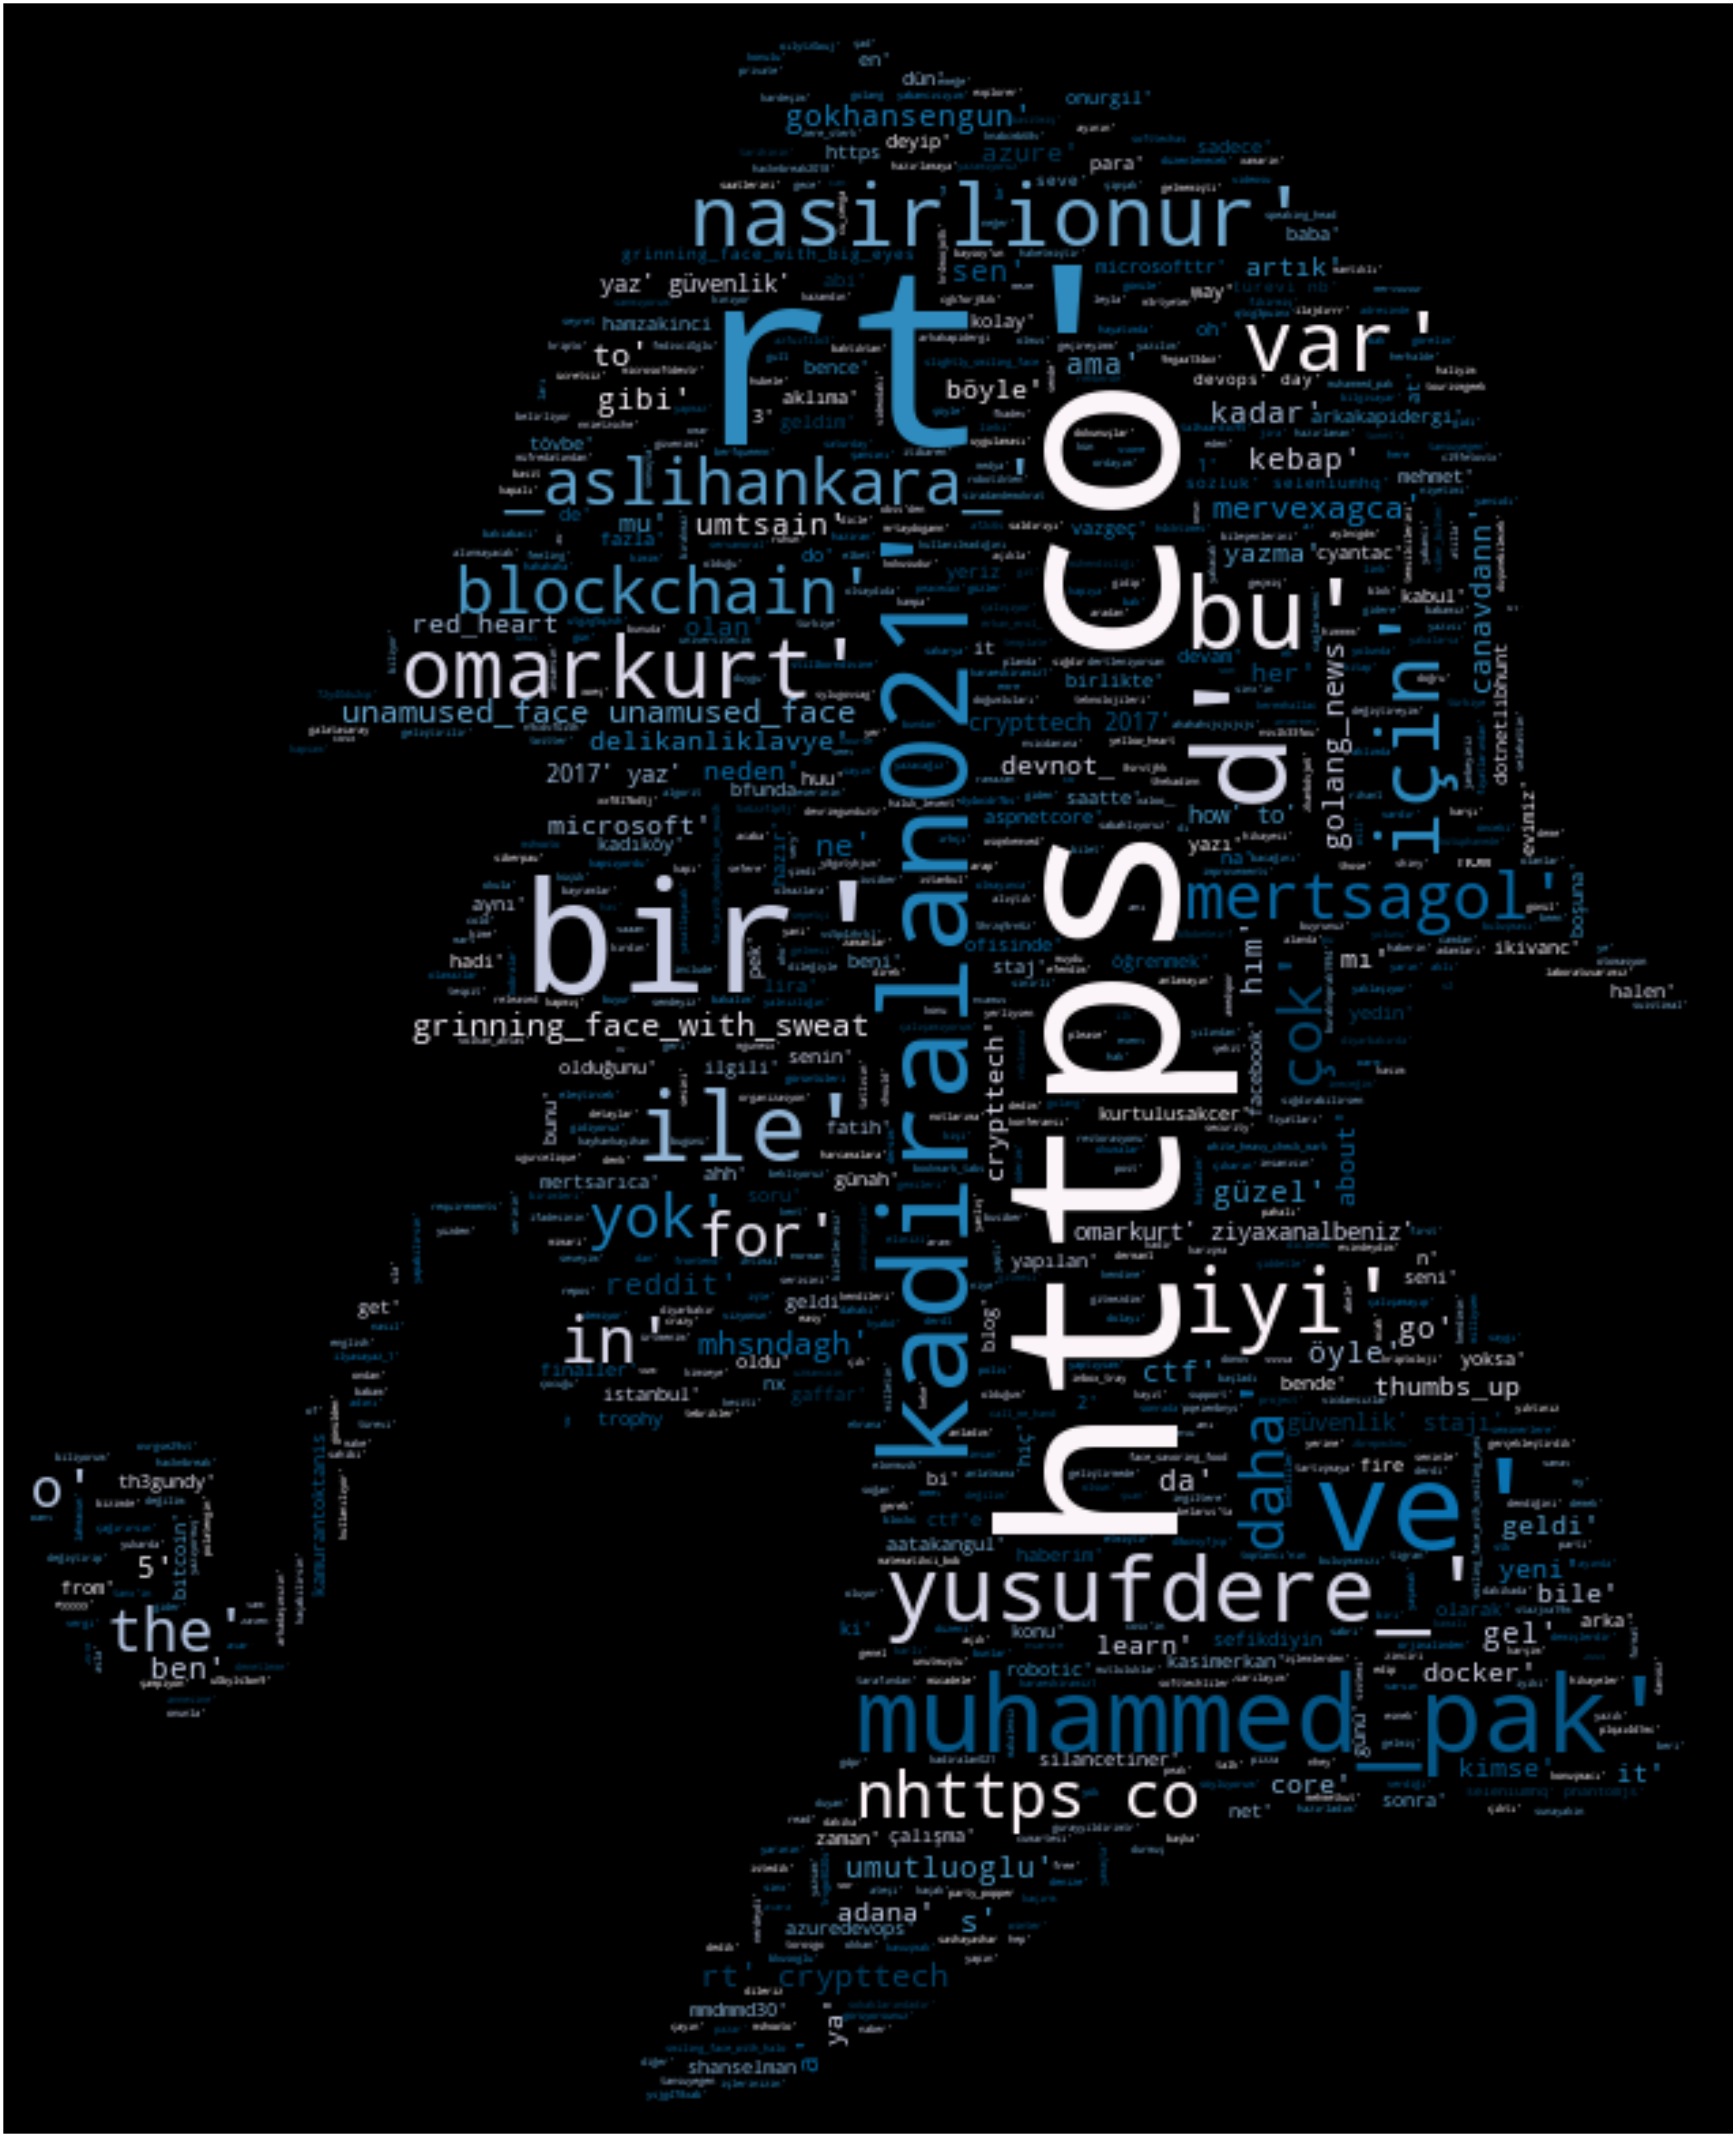

In [144]:
valuesText = ' '.join(str(v) for v in text)
frame=pd.DataFrame(cleanedList2) 
print(frame[0])
print(type(frame[0]))
a = ' '.join(str(v) for v in train.values.tolist())
print(type(test))
print(test)
wc = WordCloud(background_color="black", max_words=1000, mask=sherlock_mask, stopwords=stopwords)
wc.generate(a)
plt.figure(figsize=(80,80))
plt.imshow(wc.recolor(colormap='PuBu' , random_state=42),interpolation='bilinear')
plt.axis("off")
#plt.show()
wc.recolor(colormap='PuBu' , random_state=42).to_file('N.png')